# Library

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy

import sklearn

import warnings
warnings.filterwarnings('ignore')

import os
import random
import time

import kagglehub

# Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("naveedtaimoor/electricity-consumption-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'electricity-consumption-dataset' dataset.
Path to dataset files: /kaggle/input/electricity-consumption-dataset


In [ ]:
import pandas as pd
import os

data_path = os.path.join('.', path)
df = pd.read_excel(os.path.join(path, 'electricity_consumption_dataset.xlsx'), index_col=0, header=1, parse_dates=True)

In [ ]:
df.columns

Index(['Energy-related CO2 Emissions', 'Population (in thousands)', 'Year',
       'Month', 'State', 'Cooling Degree Days',
       'Palmer Drought Severity Index', 'Palmer Z-index',
       'Area Percentage Urban Cluster', 'Area Percentage Water',
       'Area Percentage Very Warm', 'Area Percentage Very Cold ',
       'Primary Energy Stock Change', 'Solar Net Generation by All Sectors',
       'Solar Generation at Small-Scale by Commercial Sector', 'Anomaly Level',
       'Climate Category', 'Renewable Energy Consumption: Geothermal',
       'Renewable Energy Consumption: Hydropower',
       'Renewable Energy Consumption: Solar',
       'Renewable Energy Consumption: Wind',
       'Total Energy Consumption per Capita', 'Climate Region',
       'Precipitation Anomaly', 'Area Percentage Cold Highs ',
       'Area Percentage Cold Lows ', 'Average Temperature Spring',
       'Average Temperature Summer', 'Average Temperature Fall',
       'GDP Percentage Change',
       'Gross Private Dome

In [ ]:
df = df[[
    'Energy-related CO2 Emissions',
    'Population (in thousands)',
    'Year',
    'Month',
    'State',
    'Cooling Degree Days',
    'Palmer Drought Severity Index', # Palmer Z-index 를 PDSI 로 변경(Z index가 PDSI의 구성요소)
    'Area Percentage Urban Cluster',
    'Area Percentage Water', # 추가
    'Climate Region',
    'Residential Electricity Consumption ',
    'Commercial Electricity Consumption ',
    'Industrial Electricity Consumption '
]
]

In [ ]:
df

,Energy-related CO2 Emissions,Population (in thousands),Year,Month,State,Cooling Degree Days,Palmer Drought Severity Index,Area Percentage Urban Cluster,Area Percentage Water,Climate Region,Residential Electricity Consumption,Commercial Electricity Consumption,Industrial Electricity Consumption
Sr. No.,,,,,,,,,,,,,
1,109.600000,4050.000,1990,1,AL,21,3.84,0.99,3.39,Southeast,2070093.00,820415.00,2099546.00
2,50.800000,2357.000,1990,1,AR,4,0.39,0.71,2.15,South,1026320.00,474988.00,782491.00
3,63.100000,3684.000,1990,1,AZ,0,-4.06,0.33,0.35,Southwest,1396499.00,1081793.00,809797.00
4,360.200000,29960.000,1990,1,CA,0,-2.47,0.59,4.84,West,6168009.00,6011774.00,4454664.00
5,66.500000,3308.000,1990,1,CO,0,-3.41,0.26,0.43,Southwest,1046805.00,1158963.00,545387.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19580,5.471134,647.464,2023,12,VT,0,3.48,1.02,4.16,Northeast,210133.06,158700.69,110307.49
19581,76.012265,7812.880,2023,12,WA,0,-2.91,0.62,6.79,Northwest,3991431.70,2660717.60,1712554.80
19582,88.924140,5910.955,2023,12,WI,0,-3.28,0.90,17.31,Upper Midwest,1970865.10,1880493.40,1858590.70


In [ ]:
# Total column 생성
df['Total Electricity Consumption'] = df['Residential Electricity Consumption '] + df['Commercial Electricity Consumption '] + df['Industrial Electricity Consumption ']

In [ ]:
df

,Energy-related CO2 Emissions,Population (in thousands),Year,Month,State,Cooling Degree Days,Palmer Drought Severity Index,Area Percentage Urban Cluster,Area Percentage Water,Climate Region,Residential Electricity Consumption,Commercial Electricity Consumption,Industrial Electricity Consumption,Total Electricity Consumption
Sr. No.,,,,,,,,,,,,,,
1,109.600000,4050.000,1990,1,AL,21,3.84,0.99,3.39,Southeast,2070093.00,820415.00,2099546.00,4990054.00
2,50.800000,2357.000,1990,1,AR,4,0.39,0.71,2.15,South,1026320.00,474988.00,782491.00,2283799.00
3,63.100000,3684.000,1990,1,AZ,0,-4.06,0.33,0.35,Southwest,1396499.00,1081793.00,809797.00,3288089.00
4,360.200000,29960.000,1990,1,CA,0,-2.47,0.59,4.84,West,6168009.00,6011774.00,4454664.00,16634447.00
5,66.500000,3308.000,1990,1,CO,0,-3.41,0.26,0.43,Southwest,1046805.00,1158963.00,545387.00,2751155.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19580,5.471134,647.464,2023,12,VT,0,3.48,1.02,4.16,Northeast,210133.06,158700.69,110307.49,479141.24
19581,76.012265,7812.880,2023,12,WA,0,-2.91,0.62,6.79,Northwest,3991431.70,2660717.60,1712554.80,8364704.10
19582,88.924140,5910.955,2023,12,WI,0,-3.28,0.90,17.31,Upper Midwest,1970865.10,1880493.40,1858590.70,5709949.20


In [ ]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY = 1))

In [ ]:
df = df.set_index('Date')
df.index = df.index.to_period('M')
df.sort_index(inplace=True)

In [ ]:
df

,Energy-related CO2 Emissions,Population (in thousands),Year,Month,State,Cooling Degree Days,Palmer Drought Severity Index,Area Percentage Urban Cluster,Area Percentage Water,Climate Region,Residential Electricity Consumption,Commercial Electricity Consumption,Industrial Electricity Consumption,Total Electricity Consumption
Date,,,,,,,,,,,,,,
1990-01,109.600000,4050.000,1990,1,AL,21,3.84,0.99,3.39,Southeast,2070093.00,820415.00,2099546.00,4990054.00
1990-01,50.800000,2357.000,1990,1,AR,4,0.39,0.71,2.15,South,1026320.00,474988.00,782491.00,2283799.00
1990-01,63.100000,3684.000,1990,1,AZ,0,-4.06,0.33,0.35,Southwest,1396499.00,1081793.00,809797.00,3288089.00
1990-01,360.200000,29960.000,1990,1,CA,0,-2.47,0.59,4.84,West,6168009.00,6011774.00,4454664.00,16634447.00
1990-01,66.500000,3308.000,1990,1,CO,0,-3.41,0.26,0.43,Southwest,1046805.00,1158963.00,545387.00,2751155.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12,5.471134,647.464,2023,12,VT,0,3.48,1.02,4.16,Northeast,210133.06,158700.69,110307.49,479141.24
2023-12,76.012265,7812.880,2023,12,WA,0,-2.91,0.62,6.79,Northwest,3991431.70,2660717.60,1712554.80,8364704.10
2023-12,88.924140,5910.955,2023,12,WI,0,-3.28,0.90,17.31,Upper Midwest,1970865.10,1880493.40,1858590.70,5709949.20


In [ ]:
df = df.drop(columns=['Year', 'Month', 'Residential Electricity Consumption ',
       'Commercial Electricity Consumption ',
       'Industrial Electricity Consumption '])

In [ ]:
df

,Energy-related CO2 Emissions,Population (in thousands),State,Cooling Degree Days,Palmer Drought Severity Index,Area Percentage Urban Cluster,Area Percentage Water,Climate Region,Total Electricity Consumption
Date,,,,,,,,,
1990-01,109.600000,4050.000,AL,21,3.84,0.99,3.39,Southeast,4990054.00
1990-01,50.800000,2357.000,AR,4,0.39,0.71,2.15,South,2283799.00
1990-01,63.100000,3684.000,AZ,0,-4.06,0.33,0.35,Southwest,3288089.00
1990-01,360.200000,29960.000,CA,0,-2.47,0.59,4.84,West,16634447.00
1990-01,66.500000,3308.000,CO,0,-3.41,0.26,0.43,Southwest,2751155.00
...,...,...,...,...,...,...,...,...,...
2023-12,5.471134,647.464,VT,0,3.48,1.02,4.16,Northeast,479141.24
2023-12,76.012265,7812.880,WA,0,-2.91,0.62,6.79,Northwest,8364704.10
2023-12,88.924140,5910.955,WI,0,-3.28,0.90,17.31,Upper Midwest,5709949.20


In [ ]:
# elec consumption df, group by state
elec_df = df.groupby([df.index, 'State'])['Total Electricity Consumption'].sum().unstack('State')

In [ ]:
elec_df

State,AL,AR,AZ,CA,CO,CT,DE,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01,4990054.0,2283799.00,3288089.0,16634447.0,2751155.0,2636096.00,781355.00,11520707.0,6635265.0,2574770.00,1510791.00,9188014.0,6511861.0,2181939.00,5324004.0,4881676.0,4306518.00,4962809.00,1080687.00,7098613.0,4341854.0,4760056.0,2622946.0,1178248.00,8389584.0,711759.00,1418351.00,882026.00,5383106.00,1089893.00,1264574.00,10646291.0,12314175.0,3344003.0,3994643.0,11218010.0,611358.00,5001396.0,578521.00,7542493.0,19268293.0,1159327.00,6125443.0,463124.00,8271197.0,4177454.0,2243632.00,1041186.00
1990-02,4278808.0,1920689.00,2983687.0,15963334.0,2542331.0,2305997.00,668114.00,9947182.0,5418555.0,2223572.00,1343984.00,8431655.0,5819237.0,2005561.00,4863699.0,4161548.0,3822413.00,4020954.00,1009265.00,6427818.0,3838688.0,4006920.0,2240687.0,1045805.00,6911068.0,653696.00,1270847.00,807266.00,4785597.00,997235.00,1150633.00,9740640.0,11137445.0,2874055.0,3867788.0,9652293.0,530096.00,4153984.0,513399.00,6103673.0,16131549.0,1163050.00,5037245.0,416481.00,8244228.0,3852030.0,2003846.00,988181.00
1990-03,4455446.0,1913620.00,2885691.0,15930352.0,2509300.0,2173825.00,690608.00,9656717.0,5836063.0,2269167.00,1394240.00,8359622.0,5940002.0,1932689.00,5019419.0,4178521.0,3823455.00,3988436.00,989687.00,6674918.0,3747479.0,4158391.0,2215042.0,1018355.00,6851791.0,581448.00,1255356.00,773844.00,5032213.00,1000702.00,1117190.00,9767994.0,11721095.0,2865086.0,3698530.0,9764218.0,526835.00,4153329.0,489976.00,5876491.0,15525121.0,1169769.00,5387857.0,424186.00,8153117.0,4063905.0,1977246.00,995143.00
1990-04,4341347.0,1879741.00,2687395.0,15155550.0,2375881.0,2098427.00,649971.00,9712019.0,5654155.0,2122755.00,1294923.00,7763219.0,5734301.0,1941982.00,4678683.0,4274076.0,3559628.00,3685687.00,929858.00,6366499.0,3716532.0,3965416.0,2207963.0,984342.00,6698223.0,560243.00,1213246.00,746462.00,4620938.00,973877.00,1094632.00,9268323.0,10993037.0,2772080.0,3305795.0,9163960.0,499936.00,4066065.0,472452.00,5725712.0,15952413.0,1110541.00,4893970.0,373700.00,7303750.0,3799721.0,1893585.00,937623.00
1990-05,4731342.0,1863750.00,2930900.0,15483218.0,2323895.0,2028874.00,631357.00,10901886.0,6312986.0,2157496.00,1474222.00,7867662.0,5664488.0,1891523.00,4743111.0,4790897.0,3459890.00,3420773.00,874030.00,6418592.0,3575092.0,3858484.0,2369193.0,995564.00,6585156.0,480709.00,1178114.00,677416.00,4621965.00,1008607.00,1222702.00,8942917.0,11047317.0,2891317.0,3294103.0,8627713.0,473056.00,4276711.0,430010.00,5532829.0,17068623.0,1137492.00,4782546.0,358828.00,6866157.0,3861803.0,1783271.00,942797.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,8838684.5,5156620.60,10182773.5,25033378.5,5648258.1,2491238.49,1128572.36,26981959.5,15059200.6,5118810.30,2494406.21,12924986.4,9008542.1,4372416.20,6918223.3,9985672.4,4877725.49,5607510.73,984998.19,9100726.5,6200230.8,7717736.7,5212610.7,1373249.30,13653828.9,2348562.68,3414401.50,977594.77,7382936.54,2831869.96,4201182.70,13363310.0,13731081.9,7280637.7,5132687.6,12981704.7,710791.80,8533586.0,1228403.73,9993581.6,54381541.0,3327133.09,13163206.3,466770.35,7329920.6,6519347.2,2876801.27,1397766.16
2023-09,7759337.9,4663919.50,8140699.6,22405109.0,4766068.9,2247581.05,1021892.88,24501959.6,12898774.1,4369869.20,1973476.17,10952577.9,8250276.4,3784199.07,6087746.2,9399252.1,4498465.22,4963260.31,951267.50,7979812.4,5374233.7,6681591.9,4823163.9,1200583.24,11624718.8,2220970.06,2873024.85,908599.70,6262273.93,2530076.26,3394899.70,12402521.8,12046237.7,6306531.6,4392533.6,11691655.7,671999.75,7185283.9,1096937.75,9413945.0,48763303.0,2820240.97,10949272.9,431543.21,6520515.5,5662637.5,2470830.61,1321697.54
2023-10,6442115.6,3791279.94,7036909.0,2

In [ ]:
# time series
# np.array 형태로 변환, Transpose
elec_series = elec_df.values.transpose()
elec_series.shape

(48, 408)

In [ ]:
# label
state_region = df.groupby('State')['Climate Region'].first().str.strip().to_dict() # state : region (dict)

# to array
states = elec_df.columns
y = np.array([state_region[i] for i in states])
y.shape

(48,)

In [ ]:
# META FEATURES
meta_cols = [
    'Energy-related CO2 Emissions',
    'Population (in thousands)',
    'Cooling Degree Days',
    'Palmer Drought Severity Index', # Palmer Z-index 를 PDSI 로 변경(Z index가 PDSI의 구성요소)
    'Area Percentage Urban Cluster',
    'Area Percentage Water'
    ]

meta_df = df.groupby('State')[meta_cols].mean()
meta_df

,Energy-related CO2 Emissions,Population (in thousands),Cooling Degree Days,Palmer Drought Severity Index,Area Percentage Urban Cluster,Area Percentage Water
State,,,,,,
AL,125.598036,4621.540324,162.541667,0.097426,0.99,3.39
AR,61.266892,2787.592235,147.811275,0.367941,0.71,2.15
AZ,86.010213,5833.559647,255.333333,-1.393652,0.33,0.35
CA,359.117955,35745.406147,78.301471,-1.113235,0.59,4.84
CO,86.218921,4746.313206,27.678922,-0.782451,0.26,0.43
CT,38.363174,3485.614176,51.061275,-0.024044,1.83,12.65
DE,15.498099,854.245559,95.083333,-0.172402,6.21,21.70
FL,228.695038,17899.036676,300.928922,-0.838431,1.06,18.45
GA,152.090018,9017.246382,143.938725,-0.459461,1.47,3.22


In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()
y_en = en.fit_transform(y)
y_en

array([5, 4, 6, 8, 6, 0, 0, 5, 5, 7, 2, 3, 3, 4, 3, 4, 0, 0, 0, 7, 7, 3,
       4, 1, 5, 1, 1, 0, 0, 6, 8, 0, 3, 4, 2, 0, 0, 5, 1, 3, 4, 6, 5, 0,
       2, 7, 3, 1])

In [ ]:
# Train Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, states_train, states_test = train_test_split(
    elec_series,
    y_en,
    states,
    test_size=0.2,
    random_state = 42,
    stratify=y_en
)

In [ ]:
# DTW distance

!pip install dtaidistance
from dtaidistance import dtw

"""
XA: (nA x T) matrix >> nA 개의 시계열 데이터셋 >> Train Set 입력
XB: (nB x T) matrix >> nB 개의 시계열 데이터셋 >> Test Set 입력

XA와 XB 데이터셋의 DTW 계산 함수
"""

def dtw_distance(XA, XB):
    nA, nB = len(XA), len(XB)
    dist_mat = np.zeros((nA, nB))

    for i in range(nA):
        for j in range(nB):
            dist_mat[i, j] = dtw.distance(XA[i], XB[j])     # 각 시계열 데이터 사이의 Dynamic Time Warping 거리 계산

    return dist_mat

# train set DTW 거리 계산
dist_train = dtw_distance(X_train, X_train)

# test set - train set DTW 거리 계산
dist_test = dtw_distance(X_test, X_train)

In [ ]:
meta_train = meta_df.loc[states_train].values
meta_test  = meta_df.loc[states_test].values

In [ ]:
print(meta_train)
print(meta_test)

[[ 2.28695038e+02  1.78990367e+04  3.00928922e+02 -8.38431373e-01
   1.06000000e+00  1.84500000e+01]
 [ 6.39142163e+02  2.37112103e+04  2.36186275e+02 -3.65759804e-01
   5.80000000e-01  2.74000000e+00]
 [ 8.60102129e+01  5.83355965e+03  2.55333333e+02 -1.39365196e+00
   3.30000000e-01  3.50000000e-01]
 [ 1.36285083e+02  4.19366815e+03  1.01970588e+02  8.64558824e-01
   1.41000000e+00  2.28000000e+00]
 [ 1.60650457e+01  1.27606050e+03  2.54926471e+01  9.34828431e-01
   1.40000000e+00  4.25000000e+00]
 [ 1.40243587e+01  7.99711382e+02  5.85857843e+01  2.31416667e+00
   1.50000000e-01  1.69000000e+00]
 [ 6.19953907e+01  5.31284882e+02  2.36102941e+01 -9.33651961e-01
   1.30000000e-01  7.40000000e-01]
 [ 7.47478979e+01  4.40722088e+03  1.61965686e+02 -4.24877451e-01
   1.45000000e+00  6.12000000e+00]
 [ 7.37803661e+01  6.50494526e+03  4.37794118e+01  4.21862745e-01
   1.17000000e+00  2.60900000e+01]
 [ 5.26399645e+01  6.86789353e+02  3.81911765e+01  1.37987745e+00
   1.00000000e-01  2.4000

In [ ]:
# DTW + META
X_train_ = np.hstack([dist_train, meta_train])
X_test_  = np.hstack([dist_test, meta_test])

In [ ]:
# DTW & META features scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_meta_pre = scaler.fit_transform(X_train_)
X_test_meta = scaler.transform(X_test_)

In [ ]:
X_train_meta_pre

array([[-2.45052094, -2.4311418 ,  1.32467791, ..., -1.21450167,
         0.03551325,  1.08517414],
       [-1.01271088, -3.47659075,  4.61389817, ..., -0.65548432,
        -0.43050238, -0.55298714],
       [-0.60680885, -0.18101881, -0.93082585, ..., -1.87114777,
        -0.67321885, -0.80220454],
       ...,
       [ 1.06409911,  0.84609379,  0.30858617, ..., -0.42680463,
         5.03547262,  1.42406811],
       [-1.99006497, -2.42349851,  2.60202744, ..., -1.53950569,
        -0.42079372, -0.3340095 ],
       [ 0.75398882,  0.62326559, -0.15164618, ..., -0.25134536,
         0.78307999,  0.48037876]])

# Oversampling(SMOTE)

oversampling  
https://dodonam.tistory.com/509#google_vignette  
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html  

In [ ]:
# oversampling(SMOTE)
!pip install imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=1)
X_train_meta, y_train = smote.fit_resample(X_train_meta_pre, y_train)

# Oversampling(ADASYN)

In [ ]:
# # oversampling(ADASYN)
# !pip install imblearn
# from imblearn.over_sampling import ADASYN

# adasyn = ADASYN(random_state=42, n_neighbors=1)
# X_train_meta, y_train = adasyn.fit_resample(X_train_meta_pre, y_train)

# Oversampling&Undersampling(SMOTETomek)

In [ ]:
# # oversampling & undersampling(SMOTETomek)
# !pip install imblearn
# from imblearn.combine import SMOTETomek

# smt = SMOTETomek(random_state=42)
# X_train_meta, y_train = adasyn.fit_resample(X_train_meta_pre, y_train)

# ML Model

In [ ]:
# import classification models
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.model_selection import cross_val_score

models = [
    LogisticRegression(random_state=42),
    LogisticRegression(random_state=42, penalty='elasticnet', solver='saga', l1_ratio=.5),
    OneVsRestClassifier(LogisticRegression(random_state=42, penalty='l1', solver='liblinear')),
    OneVsRestClassifier(LogisticRegression(random_state=42, penalty='l2', solver='liblinear')),
    SVC(random_state=42),
    SVC(random_state=42, kernel='rbf'),
    SVC(random_state=42, kernel='poly'),
    SVC(random_state=42, kernel='sigmoid'),
    KNeighborsClassifier(),
    NearestCentroid(),
    RandomForestClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    XGBClassifier(random_state=42),
    GaussianProcessClassifier(random_state=42, warm_start=True, max_iter_predict=500),
    GaussianNB(),
    BernoulliNB()
]

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

Multiclass Classification evaluation  
https://rython.tistory.com/14

In [ ]:
for model in models:
    print()
    print(f'{model} classification Report:\n',
          classification_report(y_train,
                                model.fit(X_train_meta, y_train).predict(X_train_meta),
                                labels=range(len(en.classes_)),
                                target_names=en.classes_))
    print()
    print(f'{model} cross validation score(balanced accuracy): {cross_val_score(model, X_train_meta, y_train, cv=3, scoring="balanced_accuracy").mean()}')
    print(f'{model} cross validation score(accuracy): {cross_val_score(model, X_train_meta, y_train, cv=3, scoring="accuracy").mean()}')
    print(f'{model} cross validation score(precision): {cross_val_score(model, X_train_meta, y_train, cv=3, scoring="precision").mean()}')
    print(f'{model} cross validation score(recall): {cross_val_score(model, X_train_meta, y_train, cv=3, scoring="recall").mean()}')
    print(f'{model} cross validation score(f1): {cross_val_score(model, X_train_meta, y_train, cv=3, scoring="f1").mean()}')
    print(f'{model} cross validation score(roc auc): {cross_val_score(model, X_train_meta, y_train, cv=3, scoring="roc_auc").mean()}')
    print(f'{model} cross validation score(auprc): {cross_val_score(model, X_train_meta, y_train, cv=3, scoring="average_precision").mean()}')
    print('-'*70)


LogisticRegression(random_state=42) classification Report:
                              precision    recall  f1-score   support

                  Northeast       1.00      0.89      0.94         9
Northern Rockies and Plains       1.00      1.00      1.00         9
                  Northwest       1.00      1.00      1.00         9
                Ohio Valley       0.90      1.00      0.95         9
                      South       1.00      1.00      1.00         9
                  Southeast       1.00      1.00      1.00         9
                  Southwest       0.90      1.00      0.95         9
              Upper Midwest       1.00      1.00      1.00         9
                       West       1.00      0.89      0.94         9

                   accuracy                           0.98        81
                  macro avg       0.98      0.98      0.98        81
               weighted avg       0.98      0.98      0.98        81


LogisticRegression(random_state=42) cr

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix

# for model in models:
#     model.fit(X_train_meta, y_train)
#     y_pred = model.predict(X_test_meta)

#     model.fit(X_train_meta, y_train)

#     y_pred = model.predict(X_test_meta)

#     print(f'{model} Classification Report:\n',
#           classification_report(y_test,
#                                 y_pred,
#                                 labels=range(len(en.classes_)),
#                                 target_names=en.classes_))
#     print()

#     # test set eval

#     y_test_labels = en.inverse_transform(y_test)
#     y_pred_labels = en.inverse_transform(y_pred)

#     test_df = pd.DataFrame({
#         'State': states_test,
#         'Answer': y_test_labels,
#         'Predicted': y_pred_labels,
#         'Correct': (y_test_labels == y_pred_labels)
#     })

#     accuracy = test_df['Correct'].mean()

#     print('\n예측 결과:\n', test_df)
#     print('\n정확도: {:.2f}%'.format(accuracy * 100))
#     print('-'*70)

In [ ]:
# # stacking
# from sklearn.ensemble import StackingClassifier
# stacking_clf = StackingClassifier(
#     estimators=[(str(i), model) for i, model in enumerate(models)], final_estimator=XGBClassifier()
# )

# stacking_clf.fit(X_train_meta, y_train)
# y_pred = stacking_clf.predict(X_test_meta)

# print('Stacking Classification Report:\n',
#       classification_report(y_test,
#                             y_pred,
#                             labels=range(len(en.classes_)),
#                             target_names=en.classes_))
# print()

# # test set eval

# y_test_labels = en.inverse_transform(y_test)
# y_pred_labels = en.inverse_transform(y_pred)

# test_df = pd.DataFrame({
#     'State': states_test,
#     'Answer': y_test_labels,
#     'Predicted': y_pred_labels,
#     'Correct': (y_test_labels == y_pred_labels)
# })

# accuracy = test_df['Correct'].mean()

# print('\n예측 결과:\n', test_df)
# print('\n정확도: {:.2f}%'.format(accuracy * 100))

# Fine tuning(eval == balanced accuracy score)
1. 각 estimators fine tuning
2. 이후 final estiamtor fine tuning  
(final 과 구성 estimators 통합한 평가 점수로 fine tuning 하는 방법?)  
(평가지표 선정)

In [ ]:
!pip install hyperopt
from hyperopt import fmin, tpe, hp, Trials

lr_space = {
    'l1_ratio': hp.loguniform('l1_ratio', np.log(0.01), np.log(1)),
    'C': hp.loguniform('C', np.log(0.01), np.log(10)),
    'max_iter': hp.quniform('max_iter', 100, 1000, 100)
}
# svc space는 svc 코드 안에
kn_space = {
    'n_neighbors': hp.quniform('n_neighbors', 1, 10, 1)
}
nc_space = {}
rf_space = {
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 10),
    'max_depth': hp.quniform('max_depth', 2, 20, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 20, 1)
}
et_space = {
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 10),
    'max_depth': hp.quniform('max_depth', 2, 20, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 20, 1)
}
ab_space = {
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 10),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3)
}
xgb_space = {
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 10),
    'num_leaves': hp.quniform('num_leaves', 2**3, 2**10, 1),
    'max_depth': hp.quniform('max_depth', 2, 20, 1),
    'min_child_samples': hp.quniform('min_child_samples', 10, 200, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3)
}
gp_space = {}
gnb_space = {}
bnb_space = {
    'alpha': hp.uniform('alpha', 0.0, 1.0)
}

In [ ]:
# elasticnet logistic regression

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from hyperopt import fmin, tpe, hp, Trials

def lr_objective_func(search_space):
    elastic_lr = LogisticRegression(l1_ratio=float(search_space['l1_ratio']),
                                       C=float(search_space['C']),
                                       max_iter=int(search_space['max_iter']),
                                       random_state=42,
                                       penalty='elasticnet',
                                       solver='saga'
                                       )

    scores = []

    kf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
    X_train_meta_np = np.array(X_train_meta)
    y_train_np = np.array(y_train)

    for tr_index, val_index in kf.split(X_train_meta_np, y_train_np):
        X_tr, y_tr = X_train_meta_np[tr_index], y_train_np[tr_index]
        X_val, y_val = X_train_meta_np[val_index], y_train_np[val_index]

        elastic_lr.fit(X_tr, y_tr)

        score = balanced_accuracy_score(y_val, elastic_lr.predict(X_val))

        scores.append(score)

    return -np.mean(scores)

#

trials = Trials()

lr_best = fmin(fn=lr_objective_func,
            space=lr_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials, rstate=np.random.default_rng(seed=42)
            )

print('lr best:', lr_best)
print()

#

best_elastic_lr = LogisticRegression(l1_ratio=float(lr_best['l1_ratio']),
                                       C=float(lr_best['C']),
                                       max_iter=int(lr_best['max_iter']),
                                       random_state=42,
                                       penalty='elasticnet',
                                       solver='saga')

best_elastic_lr.fit(X_train_meta, y_train)

score = balanced_accuracy_score(y_test, best_elastic_lr.predict(X_test_meta))
print('lr score (balanced accuracy):', score)
score = accuracy_score(y_test, best_elastic_lr.predict(X_test_meta))
print('lr score (accuracy):', score)
score = precision_score(y_test, best_elastic_lr.predict(X_test_meta), average='weighted')
print('lr score (precision):', score)
score = recall_score(y_test, best_elastic_lr.predict(X_test_meta), average='weighted')
print('lr score (recall):', score)
score = f1_score(y_test, best_elastic_lr.predict(X_test_meta), average='weighted')
print('lr score (f1):', score)

100%|██████████| 50/50 [00:58<00:00,  1.17s/trial, best loss: -0.8271604938271605]
lr best: {'C': np.float64(9.301645471092435), 'l1_ratio': np.float64(0.0571552504449935), 'max_iter': np.float64(1000.0)}

lr score (balanced accuracy): 0.8125
lr score (accuracy): 0.8
lr score (precision): 0.8
lr score (recall): 0.8
lr score (f1): 0.7666666666666666


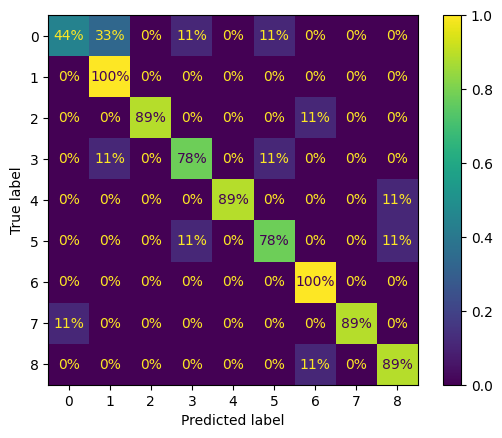

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(best_elastic_lr, X_train_meta, y_train, cv=3)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred,
                                        normalize='true', values_format='.0%')
plt.show()

In [ ]:
# Hyperparameter Tuning for SVC (Separate Kernels)
# Since optimizing the kernel type directly with `hp.choice` within the main optimization loop is causing issues, we will perform hyperparameter tuning for each kernel type separately and then compare the results.

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, classification_report
from hyperopt import fmin, tpe, hp, Trials

# Define the list of kernel types to optimize
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']
best_results = {}

# Iterate through each kernel type
for kernel_type in kernel_types:
    print(f"Optimizing for kernel: {kernel_type}")

    # Define the objective function for the current kernel type
    def objective_func(search_space):
        if kernel_type == 'linear':
            svc = SVC(gamma='auto', # gamma is ignored for linear kernel
                      C=float(search_space['C']),
                      kernel='linear',
                      probability=True,
                      random_state=42
                      )
        elif kernel_type == 'poly':
             svc = SVC(gamma=float(search_space['gamma']),
                      C=float(search_space['C']),
                      kernel='poly',
                      degree=int(search_space['degree']), # Use 'degree' from the specific space
                      probability=True,
                      random_state=42
                      )
        elif kernel_type == 'rbf':
             svc = SVC(gamma=float(search_space['gamma']),
                      C=float(search_space['C']),
                      kernel='rbf',
                      probability=True,
                      random_state=42
                      )
        elif kernel_type == 'sigmoid':
             svc = SVC(gamma=float(search_space['gamma']),
                      C=float(search_space['C']),
                      kernel='sigmoid',
                      probability=True,
                      random_state=42
                      )
        else:
            raise ValueError("Invalid kernel type")

        scores = []
        kf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
        X_train_meta_np = np.array(X_train_meta)
        y_train_np = np.array(y_train)

        for tr_index, val_index in kf.split(X_train_meta_np, y_train_np):
            X_tr, y_tr = X_train_meta_np[tr_index], y_train_np[tr_index]
            X_val, y_val = X_train_meta_np[val_index], y_train_np[val_index]

            svc.fit(X_tr, y_tr)
            score = balanced_accuracy_score(y_val, svc.predict(X_val))
            scores.append(score)

        return -np.mean(scores) # Hyperopt minimizes, so return negative score

    # Define the search space specific to the current kernel type
    if kernel_type == 'linear':
        search_space = {
            'C': hp.uniform('C_linear', 0.01, 10)
        }
    elif kernel_type == 'poly':
        search_space = {
            'gamma': hp.uniform('gamma_poly', 0.01, 10),
            'C': hp.uniform('C_poly', 0.01, 10),
            'degree': hp.quniform('degree_poly', 2, 5, 1)
        }
    elif kernel_type == 'rbf':
        search_space = {
            'gamma': hp.uniform('gamma_rbf', 0.01, 10),
            'C': hp.uniform('C_rbf', 0.01, 10)
        }
    elif kernel_type == 'sigmoid':
        search_space = {
            'gamma': hp.uniform('gamma_sigmoid', 0.01, 10),
            'C': hp.uniform('C_sigmoid', 0.01, 10)
        }
    else:
        continue # Skip if kernel type is invalid

    trials = Trials()
    best_params = fmin(fn=objective_func,
                       space=search_space,
                       algo=tpe.suggest,
                       max_evals=20, # Reduce max_evals for faster iteration
                       trials=trials,
                       rstate=np.random.default_rng(seed=42 + kernel_types.index(kernel_type)) # Use different seed for each kernel
                      )

    best_score = -trials.best_trial['result']['loss'] # Get the best score (positive)
    best_results[kernel_type] = {'best_params': best_params, 'best_score': best_score}

    print(f"Best params for {kernel_type} kernel: {best_params}")
    print(f"Best score for {kernel_type} kernel: {best_score:.4f}")
    print("-" * 30)

# Find the overall best kernel and parameters
overall_best_kernel = None
overall_best_score = -np.inf
overall_best_params = None

for kernel_type, results in best_results.items():
    if results['best_score'] > overall_best_score:
        overall_best_score = results['best_score']
        overall_best_kernel = kernel_type
        overall_best_params = results['best_params']

print("Overall Best SVC Configuration:")
print(f"Kernel: {overall_best_kernel}")
print(f"Best Parameters: {overall_best_params}")
print(f"Best Balanced Accuracy Score (on validation sets): {overall_best_score:.4f}")

# Train the final best SVC model on the full training data
if overall_best_kernel == 'linear':
    best_final_svc = SVC(gamma='auto', C=float(overall_best_params['C_linear']), kernel='linear', probability=True, random_state=42)
elif overall_best_kernel == 'poly':
    best_final_svc = SVC(gamma=float(overall_best_params['gamma_poly']), C=float(overall_best_params['C_poly']), kernel='poly', degree=int(overall_best_params['degree_poly']), probability=True, random_state=42)
elif overall_best_kernel == 'rbf':
     best_final_svc = SVC(gamma=float(overall_best_params['gamma_rbf']), C=float(overall_best_params['C_rbf']), kernel='rbf', probability=True, random_state=42)
elif overall_best_kernel == 'sigmoid':
     best_final_svc = SVC(gamma=float(overall_best_params['gamma_sigmoid']), C=float(overall_best_params['C_sigmoid']), kernel='sigmoid', probability=True, random_state=42)

best_final_svc.fit(X_train_meta, y_train)

# Evaluate the final best model on the test data
report_output = classification_report(y_test, best_final_svc.predict(X_test_meta), labels=range(len(en.classes_)), target_names=en.classes_)
print('final best svc classification Report:\n', report_output)
print()
test_score = balanced_accuracy_score(y_test, best_final_svc.predict(X_test_meta))
print(f"\nFinal Best SVC Balanced Accuracy Score (on test data): {test_score:.4f}")
test_score = accuracy_score(y_test, best_final_svc.predict(X_test_meta))
print(f"Final Best SVC Accuracy Score (on test data): {test_score:.4f}")
test_score = precision_score(y_test, best_final_svc.predict(X_test_meta), average='weighted')
print(f"Final Best SVC Precision Score (on test data): {test_score:.4f}")
test_score = recall_score(y_test, best_final_svc.predict(X_test_meta), average='weighted')
print(f"Final Best SVC Recall Score (on test data): {test_score:.4f}")
test_score = f1_score(y_test, best_final_svc.predict(X_test_meta), average='weighted')
print(f"Final Best SVC F1 Score (on test data): {test_score:.4f}")

Optimizing for kernel: linear
100%|██████████| 20/20 [00:01<00:00, 13.08trial/s, best loss: -0.8395061728395062]
Best params for linear kernel: {'C_linear': np.float64(1.4781582449774273)}
Best score for linear kernel: 0.8395
------------------------------
Optimizing for kernel: poly
100%|██████████| 20/20 [00:01<00:00, 15.29trial/s, best loss: -0.7530864197530863]
Best params for poly kernel: {'C_poly': np.float64(9.149657132333916), 'degree_poly': np.float64(2.0), 'gamma_poly': np.float64(2.3089188852013693)}
Best score for poly kernel: 0.7531
------------------------------
Optimizing for kernel: rbf
100%|██████████| 20/20 [00:00<00:00, 21.61trial/s, best loss: -0.7283950617283951]
Best params for rbf kernel: {'C_rbf': np.float64(5.951064768487776), 'gamma_rbf': np.float64(0.6137810341227492)}
Best score for rbf kernel: 0.7284
------------------------------
Optimizing for kernel: sigmoid
100%|██████████| 20/20 [00:00<00:00, 23.32trial/s, best loss: -0.27160493827160487]
Best params f

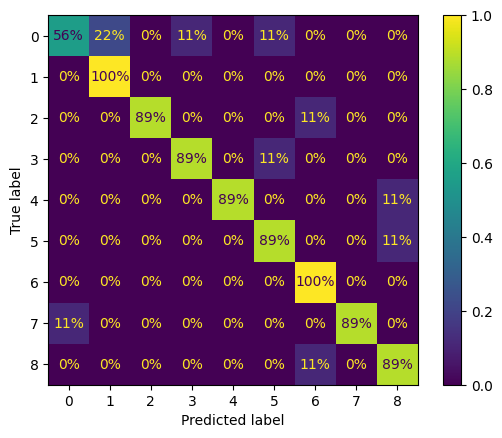

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(best_final_svc, X_train_meta, y_train, cv=3)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred,
                                        normalize='true', values_format='.0%')
plt.show()

In [ ]:
# KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from hyperopt import fmin, tpe, hp, Trials

def kn_objective_func(search_space):
    kn = KNeighborsClassifier(n_neighbors=int(search_space['n_neighbors']))

    scores = []

    kf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
    X_train_meta_np = np.array(X_train_meta)
    y_train_np = np.array(y_train)

    for tr_index, val_index in kf.split(X_train_meta_np, y_train_np):
        X_tr, y_tr = X_train_meta_np[tr_index], y_train_np[tr_index]
        X_val, y_val = X_train_meta_np[val_index], y_train_np[val_index]

        kn.fit(X_tr, y_tr)

        y_val_proba = kn.predict_proba(X_val)

        score = balanced_accuracy_score(y_val, kn.predict(X_val))

        scores.append(score)

    return -np.mean(scores)

#

trials = Trials()

kn_best = fmin(fn=kn_objective_func,
            space=kn_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials, rstate=np.random.default_rng(seed=42)
            )

print('kn best:', kn_best)
print()

#

best_kn = KNeighborsClassifier(n_neighbors=int(kn_best['n_neighbors']))

best_kn.fit(X_train_meta, y_train)

#

report_output = classification_report(y_test, best_kn.predict(X_test_meta), labels=range(len(en.classes_)), target_names=en.classes_)
print('kn classification Report:\n', report_output)
print()
score = balanced_accuracy_score(y_test, best_kn.predict(X_test_meta))
print('kn score (balanced accuracy):', score)
score = accuracy_score(y_test, best_kn.predict(X_test_meta))
print('kn score (balanced accuracy):', score)
score = precision_score(y_test, best_kn.predict(X_test_meta), average='weighted')
print('kn score (precision):', score)
score = recall_score(y_test, best_kn.predict(X_test_meta), average='weighted')
print('kn score (recall):', score)
score = f1_score(y_test, best_kn.predict(X_test_meta), average='weighted')
print('kn score (f1):', score)

100%|██████████| 50/50 [00:01<00:00, 39.45trial/s, best loss: -0.7407407407407408]
kn best: {'n_neighbors': np.float64(1.0)}

kn classification Report:
                              precision    recall  f1-score   support

                  Northeast       1.00      0.50      0.67         2
Northern Rockies and Plains       0.00      0.00      0.00         1
                  Northwest       0.50      1.00      0.67         1
                Ohio Valley       0.50      1.00      0.67         2
                      South       1.00      1.00      1.00         1
                  Southeast       1.00      1.00      1.00         1
                  Southwest       0.00      0.00      0.00         1
              Upper Midwest       1.00      1.00      1.00         1
                       West       0.00      0.00      0.00         0

                   accuracy                           0.70        10
                  macro avg       0.56      0.61      0.56        10
               we

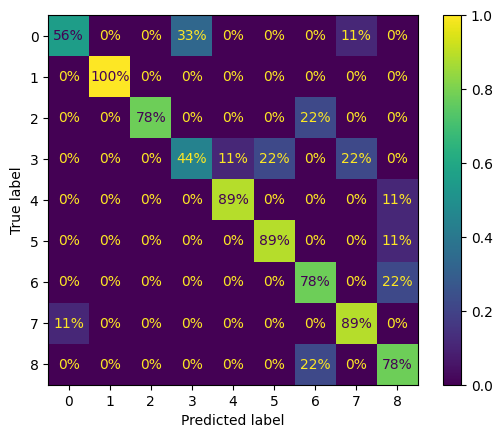

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(best_kn, X_train_meta, y_train, cv=3)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred,
                                        normalize='true', values_format='.0%')
plt.show()

In [ ]:
# RandomForest

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from hyperopt import fmin, tpe, hp, Trials

def rf_objective_func(search_space):
    rf = RandomForestClassifier(n_estimators=int(search_space['n_estimators']),
                                       max_depth=int(search_space['max_depth']),
                                       min_samples_split=int(search_space['min_samples_split']),
                                       min_samples_leaf=int(search_space['min_samples_leaf']),
                                       random_state=42)

    scores = []

    kf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
    X_train_meta_np = np.array(X_train_meta)
    y_train_np = np.array(y_train)

    for tr_index, val_index in kf.split(X_train_meta_np, y_train_np):
        X_tr, y_tr = X_train_meta_np[tr_index], y_train_np[tr_index]
        X_val, y_val = X_train_meta_np[val_index], y_train_np[val_index]

        rf.fit(X_tr, y_tr)

        y_val_proba = rf.predict_proba(X_val)

        score = balanced_accuracy_score(y_val, rf.predict(X_val))

        scores.append(score)

    return -np.mean(scores)

#

trials = Trials()

rf_best = fmin(fn=rf_objective_func,
            space=rf_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials, rstate=np.random.default_rng(seed=42)
            )

print('rf best:', rf_best)
print()

#

best_rf = RandomForestClassifier(n_estimators=int(rf_best['n_estimators']),
                                       max_depth=int(rf_best['max_depth']),
                                       min_samples_split=int(rf_best['min_samples_split']),
                                       min_samples_leaf=int(rf_best['min_samples_leaf']),
                                       random_state=42)

best_rf.fit(X_train_meta, y_train)

#

report_output = classification_report(y_test, best_rf.predict(X_test_meta), labels=range(len(en.classes_)), target_names=en.classes_)
print('rf classification Report:\n', report_output)
print()
score = balanced_accuracy_score(y_test, best_rf.predict(X_test_meta))
print('rf score (balanced accuracy):', score)
score = accuracy_score(y_test, best_rf.predict(X_test_meta))
print('rf score (accuracy):', score)
score = precision_score(y_test, best_rf.predict(X_test_meta), average='weighted')
print('rf score (precision):', score)
score = recall_score(y_test, best_rf.predict(X_test_meta), average='weighted')
print('rf score (recall):', score)
score = f1_score(y_test, best_rf.predict(X_test_meta), average='weighted')
print('rf score (f1):', score)

100%|██████████| 50/50 [03:24<00:00,  4.08s/trial, best loss: -0.7160493827160493]
rf best: {'max_depth': np.float64(14.0), 'min_samples_leaf': np.float64(2.0), 'min_samples_split': np.float64(2.0), 'n_estimators': np.float64(920.0)}

rf classification Report:
                              precision    recall  f1-score   support

                  Northeast       0.00      0.00      0.00         2
Northern Rockies and Plains       0.00      0.00      0.00         1
                  Northwest       1.00      1.00      1.00         1
                Ohio Valley       0.67      1.00      0.80         2
                      South       0.00      0.00      0.00         1
                  Southeast       1.00      1.00      1.00         1
                  Southwest       0.00      0.00      0.00         1
              Upper Midwest       0.25      1.00      0.40         1
                       West       0.00      0.00      0.00         0

                   accuracy                   

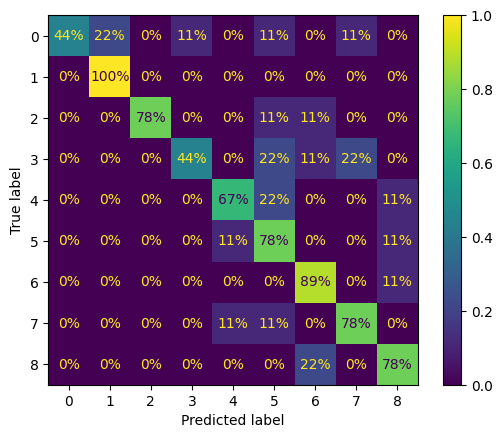

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(best_rf, X_train_meta, y_train, cv=3)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred,
                                        normalize='true', values_format='.0%')
plt.show()

In [ ]:
# Extratree

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from hyperopt import fmin, tpe, hp, Trials

def et_objective_func(search_space):
    et = ExtraTreesClassifier(n_estimators=int(search_space['n_estimators']),
                                       max_depth=int(search_space['max_depth']),
                                       min_samples_split=int(search_space['min_samples_split']),
                                       min_samples_leaf=int(search_space['min_samples_leaf']),
                                       random_state=42)

    scores = []

    kf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
    X_train_meta_np = np.array(X_train_meta)
    y_train_np = np.array(y_train)

    for tr_index, val_index in kf.split(X_train_meta_np, y_train_np):
        X_tr, y_tr = X_train_meta_np[tr_index], y_train_np[tr_index]
        X_val, y_val = X_train_meta_np[val_index], y_train_np[val_index]

        et.fit(X_tr, y_tr)

        y_val_proba = et.predict_proba(X_val)

        score = balanced_accuracy_score(y_val, et.predict(X_val))

        scores.append(score)

    return -np.mean(scores)

#

trials = Trials()

et_best = fmin(fn=et_objective_func,
            space=et_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials, rstate=np.random.default_rng(seed=42)
            )

print('et best:', et_best)
print()

#

best_et = ExtraTreesClassifier(n_estimators=int(et_best['n_estimators']),
                                       max_depth=int(et_best['max_depth']),
                                       min_samples_split=int(et_best['min_samples_split']),
                                       min_samples_leaf=int(et_best['min_samples_leaf']),
                                       random_state=42)

best_et.fit(X_train_meta, y_train)

#

report_output = classification_report(y_test, best_et.predict(X_test_meta), labels=range(len(en.classes_)), target_names=en.classes_)
print('et classification Report:\n', report_output)
print()
score = balanced_accuracy_score(y_test, best_et.predict(X_test_meta))
print('et score (balanced accuracy):', score)
score = accuracy_score(y_test, best_et.predict(X_test_meta))
print('et score (accuracy):', score)
score = precision_score(y_test, best_et.predict(X_test_meta), average='weighted')
print('et score (precision):', score)
score = recall_score(y_test, best_et.predict(X_test_meta), average='weighted')
print('et score (recall):', score)
score = f1_score(y_test, best_et.predict(X_test_meta), average='weighted')
print('et score (f1):', score)

100%|██████████| 50/50 [01:53<00:00,  2.27s/trial, best loss: -0.6790123456790123]
et best: {'max_depth': np.float64(16.0), 'min_samples_leaf': np.float64(2.0), 'min_samples_split': np.float64(9.0), 'n_estimators': np.float64(490.0)}

et classification Report:
                              precision    recall  f1-score   support

                  Northeast       0.00      0.00      0.00         2
Northern Rockies and Plains       0.00      0.00      0.00         1
                  Northwest       0.00      0.00      0.00         1
                Ohio Valley       0.67      1.00      0.80         2
                      South       0.00      0.00      0.00         1
                  Southeast       1.00      1.00      1.00         1
                  Southwest       0.00      0.00      0.00         1
              Upper Midwest       0.20      1.00      0.33         1
                       West       0.00      0.00      0.00         0

                   accuracy                   

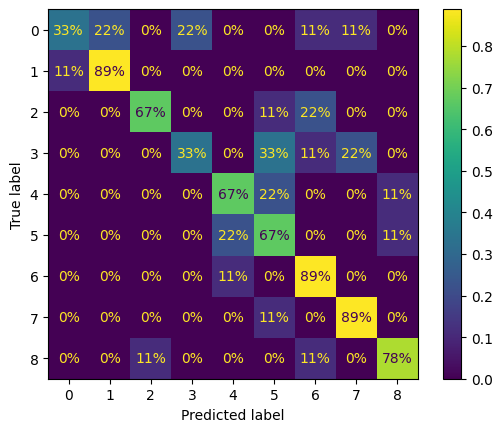

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(best_et, X_train_meta, y_train, cv=3)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred,
                                        normalize='true', values_format='.0%')
plt.show()

In [ ]:
# AdaBoost

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from hyperopt import fmin, tpe, hp, Trials

def ab_objective_func(search_space):
    ab = AdaBoostClassifier(n_estimators=int(search_space['n_estimators']),
                                       learning_rate=float(search_space['learning_rate']),
                                       random_state=42)

    scores = []

    kf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
    X_train_meta_np = np.array(X_train_meta)
    y_train_np = np.array(y_train)

    for tr_index, val_index in kf.split(X_train_meta_np, y_train_np):
        X_tr, y_tr = X_train_meta_np[tr_index], y_train_np[tr_index]
        X_val, y_val = X_train_meta_np[val_index], y_train_np[val_index]

        ab.fit(X_tr, y_tr)

        y_val_proba = ab.predict_proba(X_val)

        score = balanced_accuracy_score(y_val, ab.predict(X_val))

        scores.append(score)

    return -np.mean(scores)

#

trials = Trials()

ab_best = fmin(fn=ab_objective_func,
            space=ab_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials, rstate=np.random.default_rng(seed=42)
            )

print('ab best:', ab_best)
print()

#

best_ab = AdaBoostClassifier(n_estimators=int(ab_best['n_estimators']),
                                       learning_rate=float(ab_best['learning_rate']),
                                       random_state=42)

best_ab.fit(X_train_meta, y_train)

#

report_output = classification_report(y_test, best_ab.predict(X_test_meta), labels=range(len(en.classes_)), target_names=en.classes_)
print('ab classification Report:\n', report_output)
print()
score = balanced_accuracy_score(y_test, best_ab.predict(X_test_meta))
print('ab score (balanced accuracy):', score)
score = accuracy_score(y_test, best_ab.predict(X_test_meta))
print('ab score (accuracy):', score)
score = precision_score(y_test, best_ab.predict(X_test_meta), average='weighted')
print('ab score (precision):', score)
score = recall_score(y_test, best_ab.predict(X_test_meta), average='weighted')
print('ab score (recall):', score)
score = f1_score(y_test, best_ab.predict(X_test_meta), average='weighted')
print('ab score (f1):', score)

100%|██████████| 50/50 [04:37<00:00,  5.56s/trial, best loss: -0.6543209876543209]
ab best: {'learning_rate': np.float64(0.2964437914684102), 'n_estimators': np.float64(880.0)}

ab classification Report:
                              precision    recall  f1-score   support

                  Northeast       0.00      0.00      0.00         2
Northern Rockies and Plains       0.00      0.00      0.00         1
                  Northwest       0.50      1.00      0.67         1
                Ohio Valley       1.00      1.00      1.00         2
                      South       1.00      1.00      1.00         1
                  Southeast       0.50      1.00      0.67         1
                  Southwest       0.00      0.00      0.00         1
              Upper Midwest       0.00      0.00      0.00         1
                       West       0.00      0.00      0.00         0

                   accuracy                           0.50        10
                  macro avg       

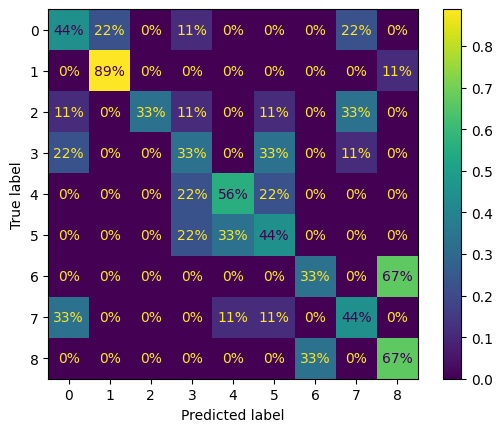

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(best_ab, X_train_meta, y_train, cv=3)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred,
                                        normalize='true', values_format='.0%')
plt.show()

In [ ]:
# XGB

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from hyperopt import fmin, tpe, hp, Trials

def xgb_objective_func(search_space):
    xgb = XGBClassifier(n_estimators=int(search_space['n_estimators']),
                                       max_depth=int(search_space['max_depth']),
                                       learning_rate=float(search_space['learning_rate']),
                                       num_leaves=int(search_space['num_leaves']),
                                       subsample=float(search_space['subsample']),
                                       min_child_samples=int(search_space['min_child_samples']),
                                       random_state=42)

    scores = []

    kf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
    X_train_meta_np = np.array(X_train_meta)
    y_train_np = np.array(y_train)

    for tr_index, val_index in kf.split(X_train_meta_np, y_train_np):
        X_tr, y_tr = X_train_meta_np[tr_index], y_train_np[tr_index]
        X_val, y_val = X_train_meta_np[val_index], y_train_np[val_index]

        xgb.fit(X_tr, y_tr)

        y_val_proba = xgb.predict_proba(X_val)

        score = balanced_accuracy_score(y_val, xgb.predict(X_val))

        scores.append(score)

    return -np.mean(scores)

#

trials = Trials()

xgb_best = fmin(fn=xgb_objective_func,
            space=xgb_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials, rstate=np.random.default_rng(seed=42)
            )

print('xgb best:', xgb_best)
print()

#

best_xgb = XGBClassifier(n_estimators=int(xgb_best['n_estimators']),
                                       max_depth=int(xgb_best['max_depth']),
                                       learning_rate=float(xgb_best['learning_rate']),
                                       num_leaves=int(xgb_best['num_leaves']),
                                       subsample=float(xgb_best['subsample']),
                                       min_child_samples=int(xgb_best['min_child_samples']),
                                       random_state=42)

best_xgb.fit(X_train_meta, y_train)

#

report_output = classification_report(y_test, best_xgb.predict(X_test_meta), labels=range(len(en.classes_)), target_names=en.classes_)
print('xgb classification Report:\n', report_output)
print()
score = balanced_accuracy_score(y_test, best_xgb.predict(X_test_meta))
print('xgb score (balanced accuracy):', score)
score = accuracy_score(y_test, best_xgb.predict(X_test_meta))
print('xgb score (accuracy):', score)
score = precision_score(y_test, best_xgb.predict(X_test_meta), average='weighted')
print('xgb score (precision):', score)
score = recall_score(y_test, best_xgb.predict(X_test_meta), average='weighted')
print('xgb score (recall):', score)
score = f1_score(y_test, best_xgb.predict(X_test_meta), average='weighted')
print('xgb score (f1):', score)

100%|██████████| 50/50 [01:05<00:00,  1.30s/trial, best loss: -0.7530864197530863]
xgb best: {'learning_rate': np.float64(0.05995859136138078), 'max_depth': np.float64(16.0), 'min_child_samples': np.float64(178.0), 'n_estimators': np.float64(100.0), 'num_leaves': np.float64(483.0), 'subsample': np.float64(0.5337114618970547)}

xgb classification Report:
                              precision    recall  f1-score   support

                  Northeast       1.00      0.50      0.67         2
Northern Rockies and Plains       0.00      0.00      0.00         1
                  Northwest       0.50      1.00      0.67         1
                Ohio Valley       0.67      1.00      0.80         2
                      South       1.00      1.00      1.00         1
                  Southeast       1.00      1.00      1.00         1
                  Southwest       0.00      0.00      0.00         1
              Upper Midwest       1.00      1.00      1.00         1
                     

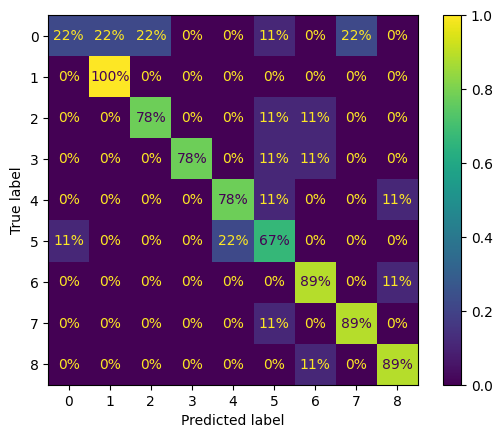

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(best_xgb, X_train_meta, y_train, cv=3)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred,
                                        normalize='true', values_format='.0%')
plt.show()

In [ ]:
# BernoulliNB

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from hyperopt import fmin, tpe, hp, Trials

def bnb_objective_func(search_space):
    bnb = BernoulliNB(alpha=float(search_space['alpha']))

    scores = []

    kf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
    X_train_meta_np = np.array(X_train_meta)
    y_train_np = np.array(y_train)

    for tr_index, val_index in kf.split(X_train_meta_np, y_train_np):
        X_tr, y_tr = X_train_meta_np[tr_index], y_train_np[tr_index]
        X_val, y_val = X_train_meta_np[val_index], y_train_np[val_index]

        bnb.fit(X_tr, y_tr)

        y_val_proba = bnb.predict_proba(X_val)

        score = balanced_accuracy_score(y_val, bnb.predict(X_val))

        scores.append(score)

    return -np.mean(scores)

#

trials = Trials()

bnb_best = fmin(fn=bnb_objective_func,
            space=bnb_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials, rstate=np.random.default_rng(seed=42)
            )

print('bnb best:', bnb_best)
print()

#

best_bnb = BernoulliNB(alpha=float(bnb_best['alpha']))

best_bnb.fit(X_train_meta, y_train)

#

report_output = classification_report(y_test, best_bnb.predict(X_test_meta), labels=range(len(en.classes_)), target_names=en.classes_)
print('bnb classification Report:\n', report_output)
print()
score = balanced_accuracy_score(y_test, best_bnb.predict(X_test_meta))
print('bnb score (balanced accuracy):', score)
score = accuracy_score(y_test, best_bnb.predict(X_test_meta))
print('bnb score (accuracy):', score)
score = precision_score(y_test, best_bnb.predict(X_test_meta), average='weighted')
print('bnb score (precision):', score)
score = recall_score(y_test, best_bnb.predict(X_test_meta), average='weighted')
print('bnb score (recall):', score)
score = f1_score(y_test, best_bnb.predict(X_test_meta), average='weighted')
print('bnb score (f1):', score)

100%|██████████| 50/50 [00:00<00:00, 78.38trial/s, best loss: -0.6172839506172839]
bnb best: {'alpha': np.float64(0.00030560464463014886)}

bnb classification Report:
                              precision    recall  f1-score   support

                  Northeast       0.00      0.00      0.00         2
Northern Rockies and Plains       0.00      0.00      0.00         1
                  Northwest       0.00      0.00      0.00         1
                Ohio Valley       0.00      0.00      0.00         2
                      South       0.50      1.00      0.67         1
                  Southeast       0.33      1.00      0.50         1
                  Southwest       0.50      1.00      0.67         1
              Upper Midwest       0.50      1.00      0.67         1
                       West       0.00      0.00      0.00         0

                   accuracy                           0.40        10
                  macro avg       0.20      0.44      0.28        10
  

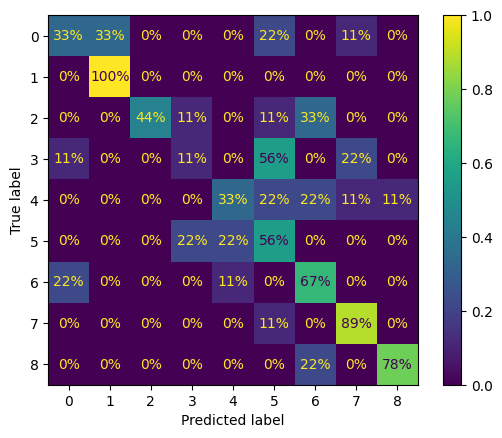

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(best_bnb, X_train_meta, y_train, cv=3)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred,
                                        normalize='true', values_format='.0%')
plt.show()

In [ ]:
# final estimators
estimators_ = [
    ('elastic_lr', best_elastic_lr),
    ('svc', best_final_svc),
    # ('kn', best_kn),
    # ('rf', best_rf),
    # ('et', best_et),
    # ('ab', best_ab),
    # ('xgb', best_xgb),
    #('bnb', best_bnb),
    # ('nc', NearestCentroid()),
    ('gp', GaussianProcessClassifier(random_state=42, warm_start=True, max_iter_predict=500)),
    # ('gnb', GaussianNB())
]

soft voting

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=estimators_,
    voting='hard'
)

voting_clf.fit(X_train_meta, y_train)

#

report_output = classification_report(y_test, voting_clf.predict(X_test_meta), labels=range(len(en.classes_)), target_names=en.classes_)
print('voting classification Report:\n', report_output)
print()
score = balanced_accuracy_score(y_test, voting_clf.predict(X_test_meta))
print('voting score (balanced accuracy):', score)
score = accuracy_score(y_test, voting_clf.predict(X_test_meta))
print('voting score (accuracy):', score)
score = precision_score(y_test, voting_clf.predict(X_test_meta), average='weighted')
print('voting score (precision):', score)
score = recall_score(y_test, voting_clf.predict(X_test_meta), average='weighted')
print('voting score (recall):', score)
score = f1_score(y_test, voting_clf.predict(X_test_meta), average='weighted')
print('voting score (f1):', score)

voting classification Report:
                              precision    recall  f1-score   support

                  Northeast       1.00      1.00      1.00         2
Northern Rockies and Plains       1.00      1.00      1.00         1
                  Northwest       0.50      1.00      0.67         1
                Ohio Valley       1.00      1.00      1.00         2
                      South       1.00      1.00      1.00         1
                  Southeast       1.00      1.00      1.00         1
                  Southwest       0.00      0.00      0.00         1
              Upper Midwest       1.00      1.00      1.00         1
                       West       0.00      0.00      0.00         0

                   accuracy                           0.90        10
                  macro avg       0.72      0.78      0.74        10
               weighted avg       0.85      0.90      0.87        10


voting score (balanced accuracy): 0.875
voting score (accuracy): 0.9

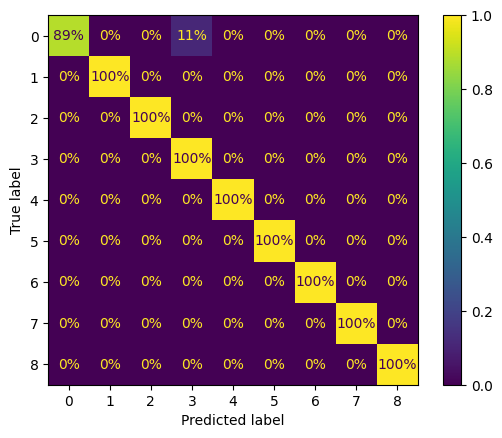

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Fit the stacking classifier on the entire training data
voting_clf.fit(X_train_meta, y_train)

# Get predictions on the training data using the fitted model
y_pred_train = voting_clf.predict(X_train_meta)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train,
                                        normalize='true', values_format='.0%',
                                        labels=range(len(en.classes_)))
plt.show()

final estimator fine tuning  
https://towardsdatascience.com/the-stacking-ensemble-method-984f5134463a/

In [ ]:
# stacking
from sklearn.ensemble import StackingClassifier
final_stacking_clf = StackingClassifier(
    estimators=estimators_,
    final_estimator=LogisticRegression(),
    passthrough=True,
    cv=3
)

final_stacking_clf.fit(X_train_meta, y_train)

#

report_output = classification_report(y_test, final_stacking_clf.predict(X_test_meta), labels=range(len(en.classes_)), target_names=en.classes_)
print('stacking classification Report:\n', report_output)
print()
score = balanced_accuracy_score(y_test, final_stacking_clf.predict(X_test_meta))
print('stacking score (balanced accuracy):', score)
score = accuracy_score(y_test, final_stacking_clf.predict(X_test_meta))
print('stacking score (accuracy):', score)
score = precision_score(y_test, final_stacking_clf.predict(X_test_meta), average='weighted')
print('stacking score (precision):', score)
score = recall_score(y_test, final_stacking_clf.predict(X_test_meta), average='weighted')
print('stacking score (recall):', score)
score = f1_score(y_test, final_stacking_clf.predict(X_test_meta), average='weighted')
print('stacking score (f1):', score)

stacking classification Report:
                              precision    recall  f1-score   support

                  Northeast       1.00      1.00      1.00         2
Northern Rockies and Plains       1.00      1.00      1.00         1
                  Northwest       0.50      1.00      0.67         1
                Ohio Valley       1.00      0.50      0.67         2
                      South       1.00      1.00      1.00         1
                  Southeast       1.00      1.00      1.00         1
                  Southwest       0.00      0.00      0.00         1
              Upper Midwest       0.50      1.00      0.67         1
                       West       0.00      0.00      0.00         0

                   accuracy                           0.80        10
                  macro avg       0.67      0.72      0.67        10
               weighted avg       0.80      0.80      0.77        10


stacking score (balanced accuracy): 0.8125
stacking score (accurac

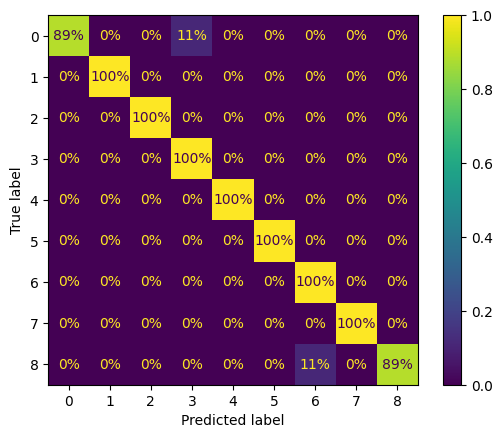

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Fit the stacking classifier on the entire training data
final_stacking_clf.fit(X_train_meta, y_train)

# Get predictions on the training data using the fitted model
y_pred_train = final_stacking_clf.predict(X_train_meta)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train,
                                        normalize='true', values_format='.0%',
                                        labels=range(len(en.classes_)))
plt.show()

# Fine tuning(eval == f1 score)
1. 각 estimators fine tuning
2. 이후 final estiamtor fine tuning  
(final 과 구성 estimators 통합한 평가 점수로 fine tuning 하는 방법?)  
(평가지표 선정)

In [ ]:
!pip install hyperopt
from hyperopt import fmin, tpe, hp, Trials

lr_space = {
    'l1_ratio': hp.loguniform('l1_ratio', np.log(0.01), np.log(1)),
    'C': hp.loguniform('C', np.log(0.01), np.log(10)),
    'max_iter': hp.quniform('max_iter', 100, 1000, 100)
}
# svc space는 svc 코드 안에
kn_space = {
    'n_neighbors': hp.quniform('n_neighbors', 1, 10, 1)
}
nc_space = {}
rf_space = {
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 10),
    'max_depth': hp.quniform('max_depth', 2, 20, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 20, 1)
}
et_space = {
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 10),
    'max_depth': hp.quniform('max_depth', 2, 20, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 20, 1)
}
ab_space = {
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 10),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3)
}
xgb_space = {
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 10),
    'num_leaves': hp.quniform('num_leaves', 2**3, 2**10, 1),
    'max_depth': hp.quniform('max_depth', 2, 20, 1),
    'min_child_samples': hp.quniform('min_child_samples', 10, 200, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3)
}
gp_space = {}
gnb_space = {}
bnb_space = {
    'alpha': hp.uniform('alpha', 0.0, 1.0)
}

In [ ]:
# elasticnet logistic regression

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from hyperopt import fmin, tpe, hp, Trials

def lr_objective_func(search_space):
    elastic_lr = LogisticRegression(l1_ratio=float(search_space['l1_ratio']),
                                       C=float(search_space['C']),
                                       max_iter=int(search_space['max_iter']),
                                       random_state=42,
                                       penalty='elasticnet',
                                       solver='saga'
                                       )

    scores = []

    kf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
    X_train_meta_np = np.array(X_train_meta)
    y_train_np = np.array(y_train)

    for tr_index, val_index in kf.split(X_train_meta_np, y_train_np):
        X_tr, y_tr = X_train_meta_np[tr_index], y_train_np[tr_index]
        X_val, y_val = X_train_meta_np[val_index], y_train_np[val_index]

        elastic_lr.fit(X_tr, y_tr)

        score = f1_score(y_val, elastic_lr.predict(X_val), average='weighted')

        scores.append(score)

    return -np.mean(scores)

#

trials = Trials()

lr_best = fmin(fn=lr_objective_func,
            space=lr_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials, rstate=np.random.default_rng(seed=42)
            )

print('lr best:', lr_best)
print()

#

best_elastic_lr = LogisticRegression(l1_ratio=float(lr_best['l1_ratio']),
                                       C=float(lr_best['C']),
                                       max_iter=int(lr_best['max_iter']),
                                       random_state=42,
                                       penalty='elasticnet',
                                       solver='saga')

best_elastic_lr.fit(X_train_meta, y_train)

score = balanced_accuracy_score(y_test, best_elastic_lr.predict(X_test_meta))
print('lr score (balanced accuracy):', score)
score = accuracy_score(y_test, best_elastic_lr.predict(X_test_meta))
print('lr score (accuracy):', score)
score = precision_score(y_test, best_elastic_lr.predict(X_test_meta), average='weighted')
print('lr score (precision):', score)
score = recall_score(y_test, best_elastic_lr.predict(X_test_meta), average='weighted')
print('lr score (recall):', score)
score = f1_score(y_test, best_elastic_lr.predict(X_test_meta), average='weighted')
print('lr score (f1):', score)

100%|██████████| 50/50 [00:25<00:00,  1.99trial/s, best loss: -0.8167548500881834]
lr best: {'C': np.float64(9.301645471092435), 'l1_ratio': np.float64(0.0571552504449935), 'max_iter': np.float64(1000.0)}

lr score (balanced accuracy): 0.8125
lr score (accuracy): 0.8
lr score (precision): 0.8
lr score (recall): 0.8
lr score (f1): 0.7666666666666666


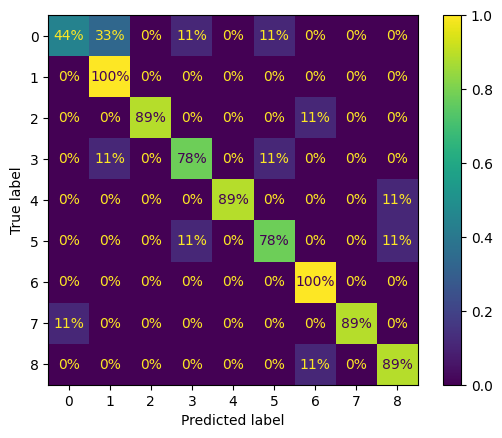

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(best_elastic_lr, X_train_meta, y_train, cv=3)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred,
                                        normalize='true', values_format='.0%')
plt.show()

In [ ]:
# Hyperparameter Tuning for SVC (Separate Kernels)
# Since optimizing the kernel type directly with `hp.choice` within the main optimization loop is causing issues, we will perform hyperparameter tuning for each kernel type separately and then compare the results.

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, classification_report
from hyperopt import fmin, tpe, hp, Trials

# Define the list of kernel types to optimize
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']
best_results = {}

# Iterate through each kernel type
for kernel_type in kernel_types:
    print(f"Optimizing for kernel: {kernel_type}")

    # Define the objective function for the current kernel type
    def objective_func(search_space):
        if kernel_type == 'linear':
            svc = SVC(gamma='auto', # gamma is ignored for linear kernel
                      C=float(search_space['C']),
                      kernel='linear',
                      probability=True,
                      random_state=42
                      )
        elif kernel_type == 'poly':
             svc = SVC(gamma=float(search_space['gamma']),
                      C=float(search_space['C']),
                      kernel='poly',
                      degree=int(search_space['degree']), # Use 'degree' from the specific space
                      probability=True,
                      random_state=42
                      )
        elif kernel_type == 'rbf':
             svc = SVC(gamma=float(search_space['gamma']),
                      C=float(search_space['C']),
                      kernel='rbf',
                      probability=True,
                      random_state=42
                      )
        elif kernel_type == 'sigmoid':
             svc = SVC(gamma=float(search_space['gamma']),
                      C=float(search_space['C']),
                      kernel='sigmoid',
                      probability=True,
                      random_state=42
                      )
        else:
            raise ValueError("Invalid kernel type")

        scores = []
        kf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
        X_train_meta_np = np.array(X_train_meta)
        y_train_np = np.array(y_train)

        for tr_index, val_index in kf.split(X_train_meta_np, y_train_np):
            X_tr, y_tr = X_train_meta_np[tr_index], y_train_np[tr_index]
            X_val, y_val = X_train_meta_np[val_index], y_train_np[val_index]

            svc.fit(X_tr, y_tr)
            score = f1_score(y_val, svc.predict(X_val), average='weighted')
            scores.append(score)

        return -np.mean(scores) # Hyperopt minimizes, so return negative score

    # Define the search space specific to the current kernel type
    if kernel_type == 'linear':
        search_space = {
            'C': hp.uniform('C_linear', 0.01, 10)
        }
    elif kernel_type == 'poly':
        search_space = {
            'gamma': hp.uniform('gamma_poly', 0.01, 10),
            'C': hp.uniform('C_poly', 0.01, 10),
            'degree': hp.quniform('degree_poly', 2, 5, 1)
        }
    elif kernel_type == 'rbf':
        search_space = {
            'gamma': hp.uniform('gamma_rbf', 0.01, 10),
            'C': hp.uniform('C_rbf', 0.01, 10)
        }
    elif kernel_type == 'sigmoid':
        search_space = {
            'gamma': hp.uniform('gamma_sigmoid', 0.01, 10),
            'C': hp.uniform('C_sigmoid', 0.01, 10)
        }
    else:
        continue # Skip if kernel type is invalid

    trials = Trials()
    best_params = fmin(fn=objective_func,
                       space=search_space,
                       algo=tpe.suggest,
                       max_evals=20, # Reduce max_evals for faster iteration
                       trials=trials,
                       rstate=np.random.default_rng(seed=42 + kernel_types.index(kernel_type)) # Use different seed for each kernel
                      )

    best_score = -trials.best_trial['result']['loss'] # Get the best score (positive)
    best_results[kernel_type] = {'best_params': best_params, 'best_score': best_score}

    print(f"Best params for {kernel_type} kernel: {best_params}")
    print(f"Best score for {kernel_type} kernel: {best_score:.4f}")
    print("-" * 30)

# Find the overall best kernel and parameters
overall_best_kernel = None
overall_best_score = -np.inf
overall_best_params = None

for kernel_type, results in best_results.items():
    if results['best_score'] > overall_best_score:
        overall_best_score = results['best_score']
        overall_best_kernel = kernel_type
        overall_best_params = results['best_params']

print("Overall Best SVC Configuration:")
print(f"Kernel: {overall_best_kernel}")
print(f"Best Parameters: {overall_best_params}")
print(f"Best Balanced Accuracy Score (on validation sets): {overall_best_score:.4f}")

# Train the final best SVC model on the full training data
if overall_best_kernel == 'linear':
    best_final_svc = SVC(gamma='auto', C=float(overall_best_params['C_linear']), kernel='linear', probability=True, random_state=42)
elif overall_best_kernel == 'poly':
    best_final_svc = SVC(gamma=float(overall_best_params['gamma_poly']), C=float(overall_best_params['C_poly']), kernel='poly', degree=int(overall_best_params['degree_poly']), probability=True, random_state=42)
elif overall_best_kernel == 'rbf':
     best_final_svc = SVC(gamma=float(overall_best_params['gamma_rbf']), C=float(overall_best_params['C_rbf']), kernel='rbf', probability=True, random_state=42)
elif overall_best_kernel == 'sigmoid':
     best_final_svc = SVC(gamma=float(overall_best_params['gamma_sigmoid']), C=float(overall_best_params['C_sigmoid']), kernel='sigmoid', probability=True, random_state=42)

best_final_svc.fit(X_train_meta, y_train)

# Evaluate the final best model on the test data
report_output = classification_report(y_test, best_final_svc.predict(X_test_meta), labels=range(len(en.classes_)), target_names=en.classes_)
print('final best svc classification Report:\n', report_output)
print()
test_score = balanced_accuracy_score(y_test, best_final_svc.predict(X_test_meta))
print(f"\nFinal Best SVC Balanced Accuracy Score (on test data): {test_score:.4f}")
test_score = accuracy_score(y_test, best_final_svc.predict(X_test_meta))
print(f"Final Best SVC Accuracy Score (on test data): {test_score:.4f}")
test_score = precision_score(y_test, best_final_svc.predict(X_test_meta), average='weighted')
print(f"Final Best SVC Precision Score (on test data): {test_score:.4f}")
test_score = recall_score(y_test, best_final_svc.predict(X_test_meta), average='weighted')
print(f"Final Best SVC Recall Score (on test data): {test_score:.4f}")
test_score = f1_score(y_test, best_final_svc.predict(X_test_meta), average='weighted')
print(f"Final Best SVC F1 Score (on test data): {test_score:.4f}")

Optimizing for kernel: linear
100%|██████████| 20/20 [00:00<00:00, 24.44trial/s, best loss: -0.8225749559082892]
Best params for linear kernel: {'C_linear': np.float64(1.4781582449774273)}
Best score for linear kernel: 0.8226
------------------------------
Optimizing for kernel: poly
100%|██████████| 20/20 [00:00<00:00, 23.31trial/s, best loss: -0.7315696649029982]
Best params for poly kernel: {'C_poly': np.float64(9.149657132333916), 'degree_poly': np.float64(2.0), 'gamma_poly': np.float64(2.3089188852013693)}
Best score for poly kernel: 0.7316
------------------------------
Optimizing for kernel: rbf
100%|██████████| 20/20 [00:00<00:00, 21.91trial/s, best loss: -0.7062554729221396]
Best params for rbf kernel: {'C_rbf': np.float64(5.951064768487776), 'gamma_rbf': np.float64(0.6137810341227492)}
Best score for rbf kernel: 0.7063
------------------------------
Optimizing for kernel: sigmoid
100%|██████████| 20/20 [00:00<00:00, 38.14trial/s, best loss: -0.19195864780660102]
Best params f

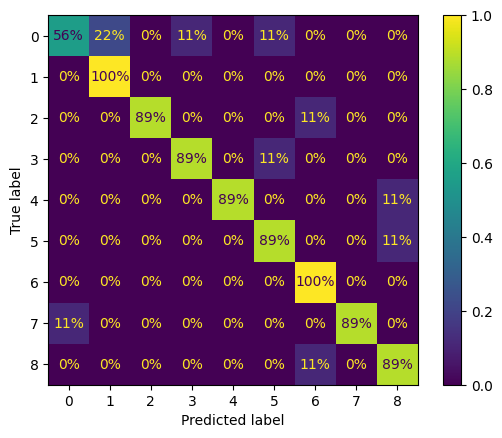

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(best_final_svc, X_train_meta, y_train, cv=3)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred,
                                        normalize='true', values_format='.0%')
plt.show()

In [ ]:
# KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from hyperopt import fmin, tpe, hp, Trials

def kn_objective_func(search_space):
    kn = KNeighborsClassifier(n_neighbors=int(search_space['n_neighbors']))

    scores = []

    kf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
    X_train_meta_np = np.array(X_train_meta)
    y_train_np = np.array(y_train)

    for tr_index, val_index in kf.split(X_train_meta_np, y_train_np):
        X_tr, y_tr = X_train_meta_np[tr_index], y_train_np[tr_index]
        X_val, y_val = X_train_meta_np[val_index], y_train_np[val_index]

        kn.fit(X_tr, y_tr)

        y_val_proba = kn.predict_proba(X_val)

        score = f1_score(y_val, kn.predict(X_val), average='weighted')

        scores.append(score)

    return -np.mean(scores)

#

trials = Trials()

kn_best = fmin(fn=kn_objective_func,
            space=kn_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials, rstate=np.random.default_rng(seed=42)
            )

print('kn best:', kn_best)
print()

#

best_kn = KNeighborsClassifier(n_neighbors=int(kn_best['n_neighbors']))

best_kn.fit(X_train_meta, y_train)

#

report_output = classification_report(y_test, best_kn.predict(X_test_meta), labels=range(len(en.classes_)), target_names=en.classes_)
print('kn classification Report:\n', report_output)
print()
score = balanced_accuracy_score(y_test, best_kn.predict(X_test_meta))
print('kn score (balanced accuracy):', score)
score = accuracy_score(y_test, best_kn.predict(X_test_meta))
print('kn score (balanced accuracy):', score)
score = precision_score(y_test, best_kn.predict(X_test_meta), average='weighted')
print('kn score (precision):', score)
score = recall_score(y_test, best_kn.predict(X_test_meta), average='weighted')
print('kn score (recall):', score)
score = f1_score(y_test, best_kn.predict(X_test_meta), average='weighted')
print('kn score (f1):', score)

100%|██████████| 50/50 [00:01<00:00, 33.72trial/s, best loss: -0.7216931216931216]
kn best: {'n_neighbors': np.float64(1.0)}

kn classification Report:
                              precision    recall  f1-score   support

                  Northeast       1.00      0.50      0.67         2
Northern Rockies and Plains       0.00      0.00      0.00         1
                  Northwest       0.50      1.00      0.67         1
                Ohio Valley       0.50      1.00      0.67         2
                      South       1.00      1.00      1.00         1
                  Southeast       1.00      1.00      1.00         1
                  Southwest       0.00      0.00      0.00         1
              Upper Midwest       1.00      1.00      1.00         1
                       West       0.00      0.00      0.00         0

                   accuracy                           0.70        10
                  macro avg       0.56      0.61      0.56        10
               we

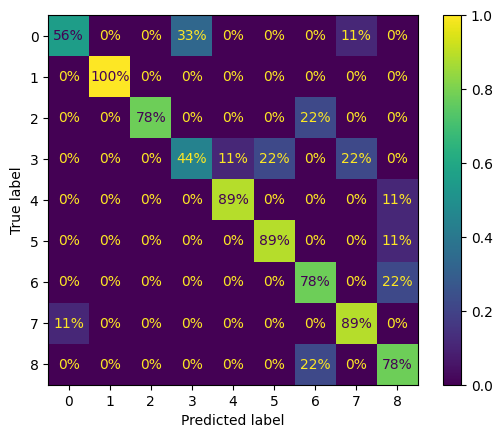

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(best_kn, X_train_meta, y_train, cv=3)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred,
                                        normalize='true', values_format='.0%')
plt.show()

In [ ]:
# RandomForest

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from hyperopt import fmin, tpe, hp, Trials

def rf_objective_func(search_space):
    rf = RandomForestClassifier(n_estimators=int(search_space['n_estimators']),
                                       max_depth=int(search_space['max_depth']),
                                       min_samples_split=int(search_space['min_samples_split']),
                                       min_samples_leaf=int(search_space['min_samples_leaf']),
                                       random_state=42)

    scores = []

    kf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
    X_train_meta_np = np.array(X_train_meta)
    y_train_np = np.array(y_train)

    for tr_index, val_index in kf.split(X_train_meta_np, y_train_np):
        X_tr, y_tr = X_train_meta_np[tr_index], y_train_np[tr_index]
        X_val, y_val = X_train_meta_np[val_index], y_train_np[val_index]

        rf.fit(X_tr, y_tr)

        y_val_proba = rf.predict_proba(X_val)

        score = f1_score(y_val, rf.predict(X_val), average='weighted')

        scores.append(score)

    return -np.mean(scores)

#

trials = Trials()

rf_best = fmin(fn=rf_objective_func,
            space=rf_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials, rstate=np.random.default_rng(seed=42)
            )

print('rf best:', rf_best)
print()

#

best_rf = RandomForestClassifier(n_estimators=int(rf_best['n_estimators']),
                                       max_depth=int(rf_best['max_depth']),
                                       min_samples_split=int(rf_best['min_samples_split']),
                                       min_samples_leaf=int(rf_best['min_samples_leaf']),
                                       random_state=42)

best_rf.fit(X_train_meta, y_train)

#

report_output = classification_report(y_test, best_rf.predict(X_test_meta), labels=range(len(en.classes_)), target_names=en.classes_)
print('rf classification Report:\n', report_output)
print()
score = balanced_accuracy_score(y_test, best_rf.predict(X_test_meta))
print('rf score (balanced accuracy):', score)
score = accuracy_score(y_test, best_rf.predict(X_test_meta))
print('rf score (accuracy):', score)
score = precision_score(y_test, best_rf.predict(X_test_meta), average='weighted')
print('rf score (precision):', score)
score = recall_score(y_test, best_rf.predict(X_test_meta), average='weighted')
print('rf score (recall):', score)
score = f1_score(y_test, best_rf.predict(X_test_meta), average='weighted')
print('rf score (f1):', score)

100%|██████████| 50/50 [02:49<00:00,  3.39s/trial, best loss: -0.7087007642563199]
rf best: {'max_depth': np.float64(9.0), 'min_samples_leaf': np.float64(2.0), 'min_samples_split': np.float64(4.0), 'n_estimators': np.float64(990.0)}

rf classification Report:
                              precision    recall  f1-score   support

                  Northeast       0.00      0.00      0.00         2
Northern Rockies and Plains       0.00      0.00      0.00         1
                  Northwest       1.00      1.00      1.00         1
                Ohio Valley       0.67      1.00      0.80         2
                      South       0.00      0.00      0.00         1
                  Southeast       1.00      1.00      1.00         1
                  Southwest       0.00      0.00      0.00         1
              Upper Midwest       0.25      1.00      0.40         1
                       West       0.00      0.00      0.00         0

                   accuracy                    

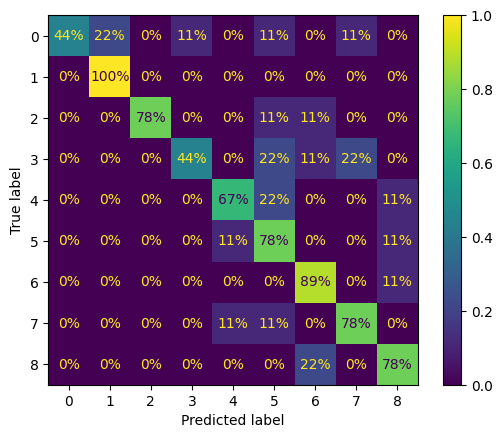

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(best_rf, X_train_meta, y_train, cv=3)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred,
                                        normalize='true', values_format='.0%')
plt.show()

In [ ]:
# Extratree

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from hyperopt import fmin, tpe, hp, Trials

def et_objective_func(search_space):
    et = ExtraTreesClassifier(n_estimators=int(search_space['n_estimators']),
                                       max_depth=int(search_space['max_depth']),
                                       min_samples_split=int(search_space['min_samples_split']),
                                       min_samples_leaf=int(search_space['min_samples_leaf']),
                                       random_state=42)

    scores = []

    kf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
    X_train_meta_np = np.array(X_train_meta)
    y_train_np = np.array(y_train)

    for tr_index, val_index in kf.split(X_train_meta_np, y_train_np):
        X_tr, y_tr = X_train_meta_np[tr_index], y_train_np[tr_index]
        X_val, y_val = X_train_meta_np[val_index], y_train_np[val_index]

        et.fit(X_tr, y_tr)

        y_val_proba = et.predict_proba(X_val)

        score = f1_score(y_val, et.predict(X_val), average='weighted')

        scores.append(score)

    return -np.mean(scores)

#

trials = Trials()

et_best = fmin(fn=et_objective_func,
            space=et_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials, rstate=np.random.default_rng(seed=42)
            )

print('et best:', et_best)
print()

#

best_et = ExtraTreesClassifier(n_estimators=int(et_best['n_estimators']),
                                       max_depth=int(et_best['max_depth']),
                                       min_samples_split=int(et_best['min_samples_split']),
                                       min_samples_leaf=int(et_best['min_samples_leaf']),
                                       random_state=42)

best_et.fit(X_train_meta, y_train)

#

report_output = classification_report(y_test, best_et.predict(X_test_meta), labels=range(len(en.classes_)), target_names=en.classes_)
print('et classification Report:\n', report_output)
print()
score = balanced_accuracy_score(y_test, best_et.predict(X_test_meta))
print('et score (balanced accuracy):', score)
score = accuracy_score(y_test, best_et.predict(X_test_meta))
print('et score (accuracy):', score)
score = precision_score(y_test, best_et.predict(X_test_meta), average='weighted')
print('et score (precision):', score)
score = recall_score(y_test, best_et.predict(X_test_meta), average='weighted')
print('et score (recall):', score)
score = f1_score(y_test, best_et.predict(X_test_meta), average='weighted')
print('et score (f1):', score)

100%|██████████| 50/50 [01:54<00:00,  2.29s/trial, best loss: -0.6775773609106942]
et best: {'max_depth': np.float64(16.0), 'min_samples_leaf': np.float64(2.0), 'min_samples_split': np.float64(6.0), 'n_estimators': np.float64(790.0)}

et classification Report:
                              precision    recall  f1-score   support

                  Northeast       0.00      0.00      0.00         2
Northern Rockies and Plains       0.00      0.00      0.00         1
                  Northwest       0.00      0.00      0.00         1
                Ohio Valley       0.67      1.00      0.80         2
                      South       0.00      0.00      0.00         1
                  Southeast       1.00      1.00      1.00         1
                  Southwest       0.00      0.00      0.00         1
              Upper Midwest       0.20      1.00      0.33         1
                       West       0.00      0.00      0.00         0

                   accuracy                   

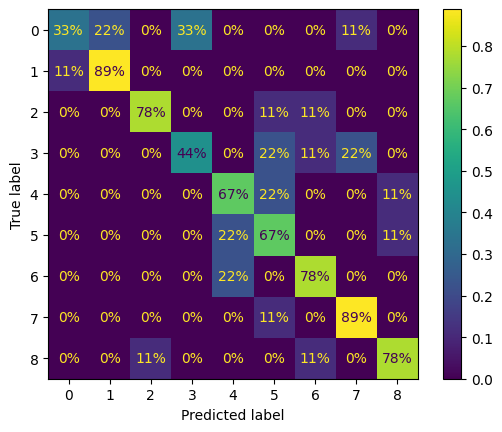

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(best_et, X_train_meta, y_train, cv=3)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred,
                                        normalize='true', values_format='.0%')
plt.show()

In [ ]:
# AdaBoost

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from hyperopt import fmin, tpe, hp, Trials

def ab_objective_func(search_space):
    ab = AdaBoostClassifier(n_estimators=int(search_space['n_estimators']),
                                       learning_rate=float(search_space['learning_rate']),
                                       random_state=42)

    scores = []

    kf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
    X_train_meta_np = np.array(X_train_meta)
    y_train_np = np.array(y_train)

    for tr_index, val_index in kf.split(X_train_meta_np, y_train_np):
        X_tr, y_tr = X_train_meta_np[tr_index], y_train_np[tr_index]
        X_val, y_val = X_train_meta_np[val_index], y_train_np[val_index]

        ab.fit(X_tr, y_tr)

        y_val_proba = ab.predict_proba(X_val)

        score = f1_score(y_val, ab.predict(X_val), average='weighted')

        scores.append(score)

    return -np.mean(scores)

#

trials = Trials()

ab_best = fmin(fn=ab_objective_func,
            space=ab_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials, rstate=np.random.default_rng(seed=42)
            )

print('ab best:', ab_best)
print()

#

best_ab = AdaBoostClassifier(n_estimators=int(ab_best['n_estimators']),
                                       learning_rate=float(ab_best['learning_rate']),
                                       random_state=42)

best_ab.fit(X_train_meta, y_train)

#

report_output = classification_report(y_test, best_ab.predict(X_test_meta), labels=range(len(en.classes_)), target_names=en.classes_)
print('ab classification Report:\n', report_output)
print()
score = balanced_accuracy_score(y_test, best_ab.predict(X_test_meta))
print('ab score (balanced accuracy):', score)
score = accuracy_score(y_test, best_ab.predict(X_test_meta))
print('ab score (accuracy):', score)
score = precision_score(y_test, best_ab.predict(X_test_meta), average='weighted')
print('ab score (precision):', score)
score = recall_score(y_test, best_ab.predict(X_test_meta), average='weighted')
print('ab score (recall):', score)
score = f1_score(y_test, best_ab.predict(X_test_meta), average='weighted')
print('ab score (f1):', score)

100%|██████████| 50/50 [04:42<00:00,  5.66s/trial, best loss: -0.5880952380952381]
ab best: {'learning_rate': np.float64(0.2964437914684102), 'n_estimators': np.float64(880.0)}

ab classification Report:
                              precision    recall  f1-score   support

                  Northeast       0.00      0.00      0.00         2
Northern Rockies and Plains       0.00      0.00      0.00         1
                  Northwest       0.50      1.00      0.67         1
                Ohio Valley       1.00      1.00      1.00         2
                      South       1.00      1.00      1.00         1
                  Southeast       0.50      1.00      0.67         1
                  Southwest       0.00      0.00      0.00         1
              Upper Midwest       0.00      0.00      0.00         1
                       West       0.00      0.00      0.00         0

                   accuracy                           0.50        10
                  macro avg       

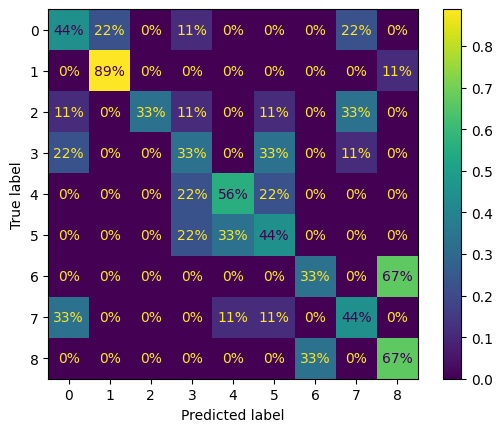

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(best_ab, X_train_meta, y_train, cv=3)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred,
                                        normalize='true', values_format='.0%')
plt.show()

In [ ]:
# XGB

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from hyperopt import fmin, tpe, hp, Trials

def xgb_objective_func(search_space):
    xgb = XGBClassifier(n_estimators=int(search_space['n_estimators']),
                                       max_depth=int(search_space['max_depth']),
                                       learning_rate=float(search_space['learning_rate']),
                                       num_leaves=int(search_space['num_leaves']),
                                       subsample=float(search_space['subsample']),
                                       min_child_samples=int(search_space['min_child_samples']),
                                       random_state=42)

    scores = []

    kf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
    X_train_meta_np = np.array(X_train_meta)
    y_train_np = np.array(y_train)

    for tr_index, val_index in kf.split(X_train_meta_np, y_train_np):
        X_tr, y_tr = X_train_meta_np[tr_index], y_train_np[tr_index]
        X_val, y_val = X_train_meta_np[val_index], y_train_np[val_index]

        xgb.fit(X_tr, y_tr)

        y_val_proba = xgb.predict_proba(X_val)

        score = f1_score(y_val, xgb.predict(X_val), average='weighted')

        scores.append(score)

    return -np.mean(scores)

#

trials = Trials()

xgb_best = fmin(fn=xgb_objective_func,
            space=xgb_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials, rstate=np.random.default_rng(seed=42)
            )

print('xgb best:', xgb_best)
print()

#

best_xgb = XGBClassifier(n_estimators=int(xgb_best['n_estimators']),
                                       max_depth=int(xgb_best['max_depth']),
                                       learning_rate=float(xgb_best['learning_rate']),
                                       num_leaves=int(xgb_best['num_leaves']),
                                       subsample=float(xgb_best['subsample']),
                                       min_child_samples=int(xgb_best['min_child_samples']),
                                       random_state=42)

best_xgb.fit(X_train_meta, y_train)

#

report_output = classification_report(y_test, best_xgb.predict(X_test_meta), labels=range(len(en.classes_)), target_names=en.classes_)
print('xgb classification Report:\n', report_output)
print()
score = balanced_accuracy_score(y_test, best_xgb.predict(X_test_meta))
print('xgb score (balanced accuracy):', score)
score = accuracy_score(y_test, best_xgb.predict(X_test_meta))
print('xgb score (accuracy):', score)
score = precision_score(y_test, best_xgb.predict(X_test_meta), average='weighted')
print('xgb score (precision):', score)
score = recall_score(y_test, best_xgb.predict(X_test_meta), average='weighted')
print('xgb score (recall):', score)
score = f1_score(y_test, best_xgb.predict(X_test_meta), average='weighted')
print('xgb score (f1):', score)

100%|██████████| 50/50 [01:00<00:00,  1.22s/trial, best loss: -0.7272486772486774]
xgb best: {'learning_rate': np.float64(0.05995859136138078), 'max_depth': np.float64(16.0), 'min_child_samples': np.float64(178.0), 'n_estimators': np.float64(100.0), 'num_leaves': np.float64(483.0), 'subsample': np.float64(0.5337114618970547)}

xgb classification Report:
                              precision    recall  f1-score   support

                  Northeast       1.00      0.50      0.67         2
Northern Rockies and Plains       0.00      0.00      0.00         1
                  Northwest       0.50      1.00      0.67         1
                Ohio Valley       0.67      1.00      0.80         2
                      South       1.00      1.00      1.00         1
                  Southeast       1.00      1.00      1.00         1
                  Southwest       0.00      0.00      0.00         1
              Upper Midwest       1.00      1.00      1.00         1
                     

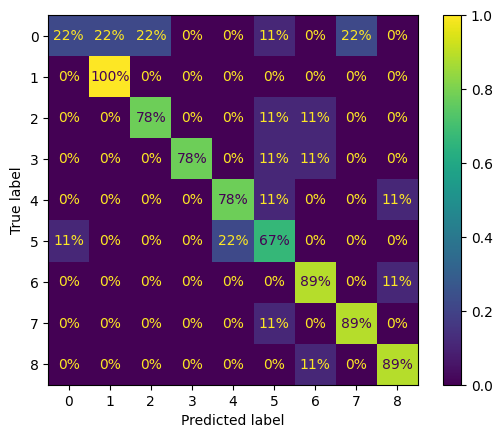

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(best_xgb, X_train_meta, y_train, cv=3)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred,
                                        normalize='true', values_format='.0%')
plt.show()

In [ ]:
# BernoulliNB

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from hyperopt import fmin, tpe, hp, Trials

def bnb_objective_func(search_space):
    bnb = BernoulliNB(alpha=float(search_space['alpha']))

    scores = []

    kf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
    X_train_meta_np = np.array(X_train_meta)
    y_train_np = np.array(y_train)

    for tr_index, val_index in kf.split(X_train_meta_np, y_train_np):
        X_tr, y_tr = X_train_meta_np[tr_index], y_train_np[tr_index]
        X_val, y_val = X_train_meta_np[val_index], y_train_np[val_index]

        bnb.fit(X_tr, y_tr)

        y_val_proba = bnb.predict_proba(X_val)

        score = f1_score(y_val, bnb.predict(X_val), average='weighted')

        scores.append(score)

    return -np.mean(scores)

#

trials = Trials()

bnb_best = fmin(fn=bnb_objective_func,
            space=bnb_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials, rstate=np.random.default_rng(seed=42)
            )

print('bnb best:', bnb_best)
print()

#

best_bnb = BernoulliNB(alpha=float(bnb_best['alpha']))

best_bnb.fit(X_train_meta, y_train)

#

report_output = classification_report(y_test, best_bnb.predict(X_test_meta), labels=range(len(en.classes_)), target_names=en.classes_)
print('bnb classification Report:\n', report_output)
print()
score = balanced_accuracy_score(y_test, best_bnb.predict(X_test_meta))
print('bnb score (balanced accuracy):', score)
score = accuracy_score(y_test, best_bnb.predict(X_test_meta))
print('bnb score (accuracy):', score)
score = precision_score(y_test, best_bnb.predict(X_test_meta), average='weighted')
print('bnb score (precision):', score)
score = recall_score(y_test, best_bnb.predict(X_test_meta), average='weighted')
print('bnb score (recall):', score)
score = f1_score(y_test, best_bnb.predict(X_test_meta), average='weighted')
print('bnb score (f1):', score)

100%|██████████| 50/50 [00:01<00:00, 44.26trial/s, best loss: -0.5840094062316284]
bnb best: {'alpha': np.float64(0.00030560464463014886)}

bnb classification Report:
                              precision    recall  f1-score   support

                  Northeast       0.00      0.00      0.00         2
Northern Rockies and Plains       0.00      0.00      0.00         1
                  Northwest       0.00      0.00      0.00         1
                Ohio Valley       0.00      0.00      0.00         2
                      South       0.50      1.00      0.67         1
                  Southeast       0.33      1.00      0.50         1
                  Southwest       0.50      1.00      0.67         1
              Upper Midwest       0.50      1.00      0.67         1
                       West       0.00      0.00      0.00         0

                   accuracy                           0.40        10
                  macro avg       0.20      0.44      0.28        10
  

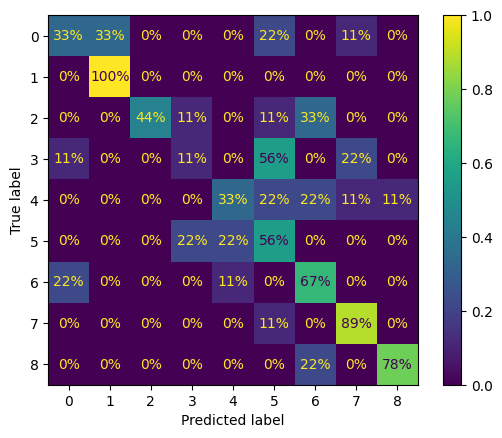

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(best_bnb, X_train_meta, y_train, cv=3)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred,
                                        normalize='true', values_format='.0%')
plt.show()

In [ ]:
# final estimators
estimators_ = [
    ('elastic_lr', best_elastic_lr),
    ('svc', best_final_svc),
    # ('kn', best_kn),
    # ('rf', best_rf),
    # ('et', best_et),
    # ('ab', best_ab),
    # ('xgb', best_xgb),
    #('bnb', best_bnb),
    # ('nc', NearestCentroid()),
    ('gp', GaussianProcessClassifier(random_state=42, warm_start=True, max_iter_predict=500)),
    # ('gnb', GaussianNB())
]

hard voting

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=estimators_,
    voting='hard'
)

voting_clf.fit(X_train_meta, y_train)

#

report_output = classification_report(y_test, voting_clf.predict(X_test_meta), labels=range(len(en.classes_)), target_names=en.classes_)
print('voting classification Report:\n', report_output)
print()
score = balanced_accuracy_score(y_test, voting_clf.predict(X_test_meta))
print('voting score (balanced accuracy):', score)
score = accuracy_score(y_test, voting_clf.predict(X_test_meta))
print('voting score (accuracy):', score)
score = precision_score(y_test, voting_clf.predict(X_test_meta), average='weighted')
print('voting score (precision):', score)
score = recall_score(y_test, voting_clf.predict(X_test_meta), average='weighted')
print('voting score (recall):', score)
score = f1_score(y_test, voting_clf.predict(X_test_meta), average='weighted')
print('voting score (f1):', score)

voting classification Report:
                              precision    recall  f1-score   support

                  Northeast       1.00      1.00      1.00         2
Northern Rockies and Plains       1.00      1.00      1.00         1
                  Northwest       0.50      1.00      0.67         1
                Ohio Valley       1.00      1.00      1.00         2
                      South       1.00      1.00      1.00         1
                  Southeast       1.00      1.00      1.00         1
                  Southwest       0.00      0.00      0.00         1
              Upper Midwest       1.00      1.00      1.00         1
                       West       0.00      0.00      0.00         0

                   accuracy                           0.90        10
                  macro avg       0.72      0.78      0.74        10
               weighted avg       0.85      0.90      0.87        10


voting score (balanced accuracy): 0.875
voting score (accuracy): 0.9

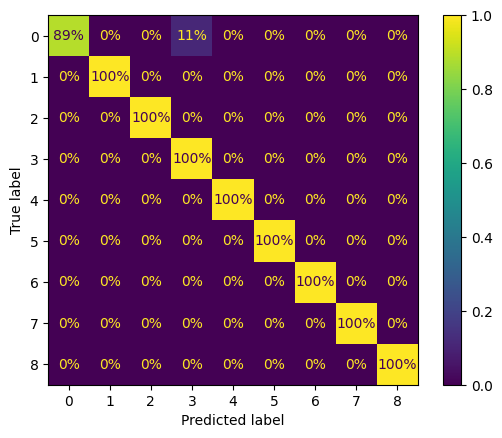

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Fit the stacking classifier on the entire training data
voting_clf.fit(X_train_meta, y_train)

# Get predictions on the training data using the fitted model
y_pred_train = voting_clf.predict(X_train_meta)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train,
                                        normalize='true', values_format='.0%',
                                        labels=range(len(en.classes_)))
plt.show()

final estimator fine tuning  
https://towardsdatascience.com/the-stacking-ensemble-method-984f5134463a/

In [ ]:
# stacking
from sklearn.ensemble import StackingClassifier
final_stacking_clf = StackingClassifier(
    estimators=estimators_,
    final_estimator=LogisticRegression(),
    passthrough=True,
    cv=3
)

final_stacking_clf.fit(X_train_meta, y_train)

#

report_output = classification_report(y_test, final_stacking_clf.predict(X_test_meta), labels=range(len(en.classes_)), target_names=en.classes_)
print('stacking classification Report:\n', report_output)
print()
score = balanced_accuracy_score(y_test, final_stacking_clf.predict(X_test_meta))
print('stacking score (balanced accuracy):', score)
score = accuracy_score(y_test, final_stacking_clf.predict(X_test_meta))
print('stacking score (accuracy):', score)
score = precision_score(y_test, final_stacking_clf.predict(X_test_meta), average='weighted')
print('stacking score (precision):', score)
score = recall_score(y_test, final_stacking_clf.predict(X_test_meta), average='weighted')
print('stacking score (recall):', score)
score = f1_score(y_test, final_stacking_clf.predict(X_test_meta), average='weighted')
print('stacking score (f1):', score)

stacking classification Report:
                              precision    recall  f1-score   support

                  Northeast       1.00      1.00      1.00         2
Northern Rockies and Plains       1.00      1.00      1.00         1
                  Northwest       0.50      1.00      0.67         1
                Ohio Valley       1.00      0.50      0.67         2
                      South       1.00      1.00      1.00         1
                  Southeast       1.00      1.00      1.00         1
                  Southwest       0.00      0.00      0.00         1
              Upper Midwest       0.50      1.00      0.67         1
                       West       0.00      0.00      0.00         0

                   accuracy                           0.80        10
                  macro avg       0.67      0.72      0.67        10
               weighted avg       0.80      0.80      0.77        10


stacking score (balanced accuracy): 0.8125
stacking score (accurac

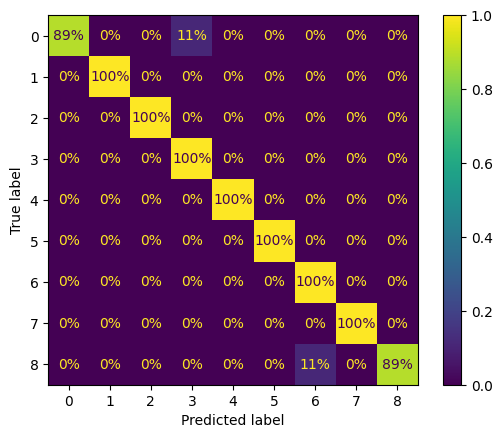

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Fit the stacking classifier on the entire training data
final_stacking_clf.fit(X_train_meta, y_train)

# Get predictions on the training data using the fitted model
y_pred_train = final_stacking_clf.predict(X_train_meta)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train,
                                        normalize='true', values_format='.0%',
                                        labels=range(len(en.classes_)))
plt.show()